# Untitled

#### 정재현

#### 2023-05-19

``` r
library(dplyr)
library(NbClust)
library(doParallel)
library(cluster)
library(corrplot)
#df <- read.csv("data3.csv", fileEncoding = "cp949")
#str(df)

#df.set_index(keys="법정동", drop=T)

#df_name <- df[,'법정동']

#df1 <- df[,c(2,6)]
#str(df1)

#df_scaled <- data.frame(scale(df1))
#str(df_scaled)
```

``` r
setwd("C:/Users/jaehy/Desktop/전종설2/법정동/")
df6 <- read.csv("final_data.csv", fileEncoding = "cp949")
str(df6)
```

``` hljs
## 'data.frame':    363 obs. of  8 variables:
##  $ 법정동                       : chr  "종로구 청운동" "종로구 신교동" "종로구 궁정동" "종로구 누상동" ...
##  $ 인구수                       : int  2339 1361 192 3206 1880 994 3193 2655 246 106 ...
##  $ 택배함.개수                  : int  0 0 1 0 0 0 0 0 0 0 ...
##  $ 물류창고.개수                : int  0 0 0 0 0 0 0 0 0 0 ...
##  $ 공공자전거.거치대수.LCD...QR.: int  8 0 0 0 0 0 14 12 0 26 ...
##  $ 친환경차.등록대수.전기.수소. : int  0 0 69 0 0 0 0 163 0 140 ...
##  $ 충전소.개수.전기.수소.       : int  0 0 0 0 0 0 4 2 1 0 ...
##  $ 친환경차.한대당.충전소.개수  : num  0 0 0 0 0 ...
```

``` r
df_cor <- df6%>%
  select(-법정동)
corr_df <- cor(df_cor)
plot.new()
```

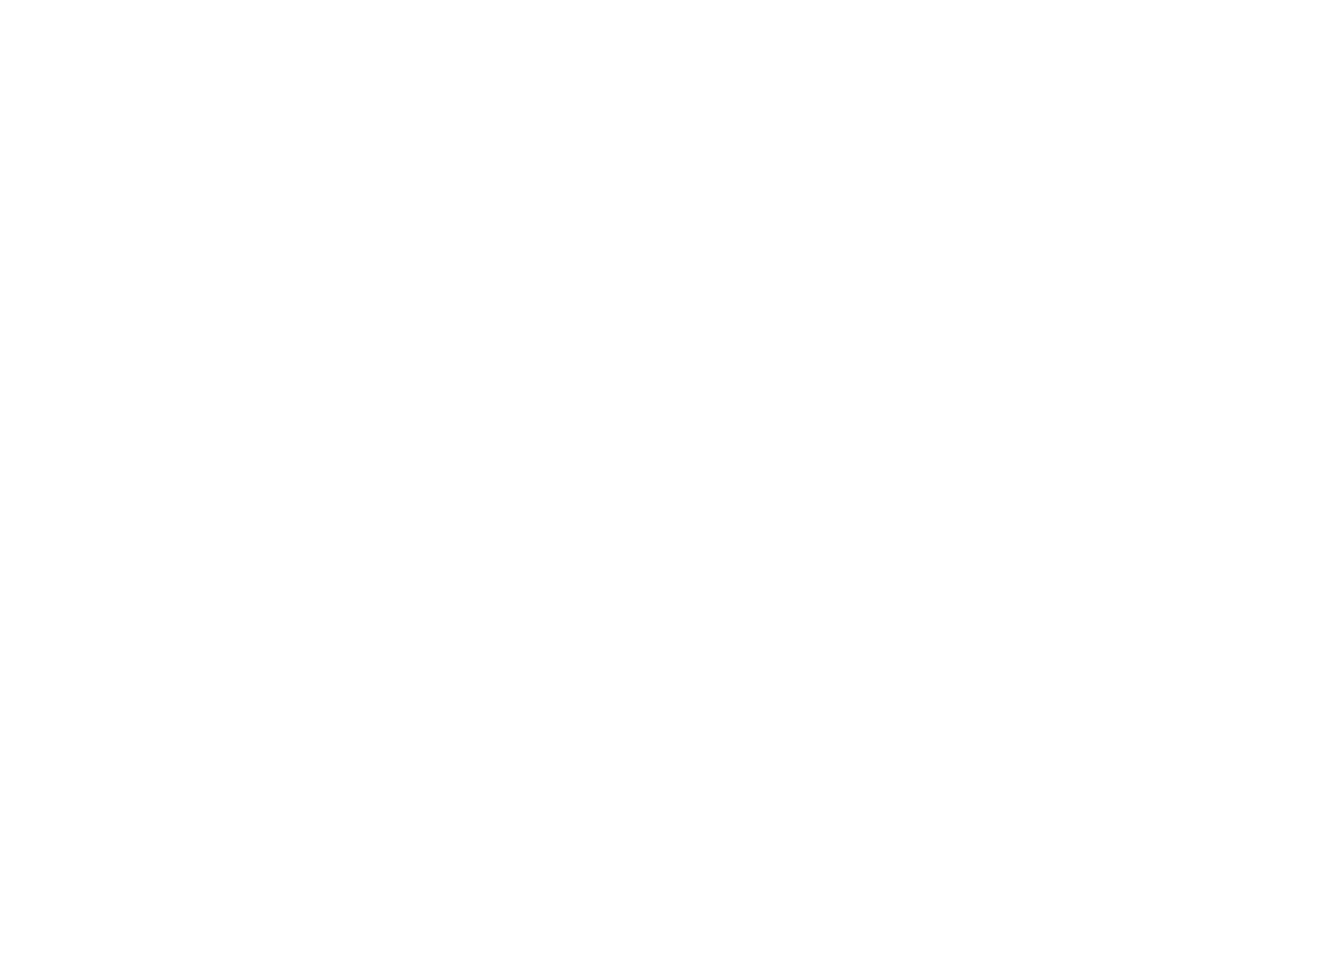

``` r
dev.off()
```

``` hljs
## null device 
##           1
```

``` r
corrplot(corr_df,method='number')
```

``` r
corrplot(corr_df, method = 'number', order = 'hclust', type = 'lower', diag = FALSE)
```

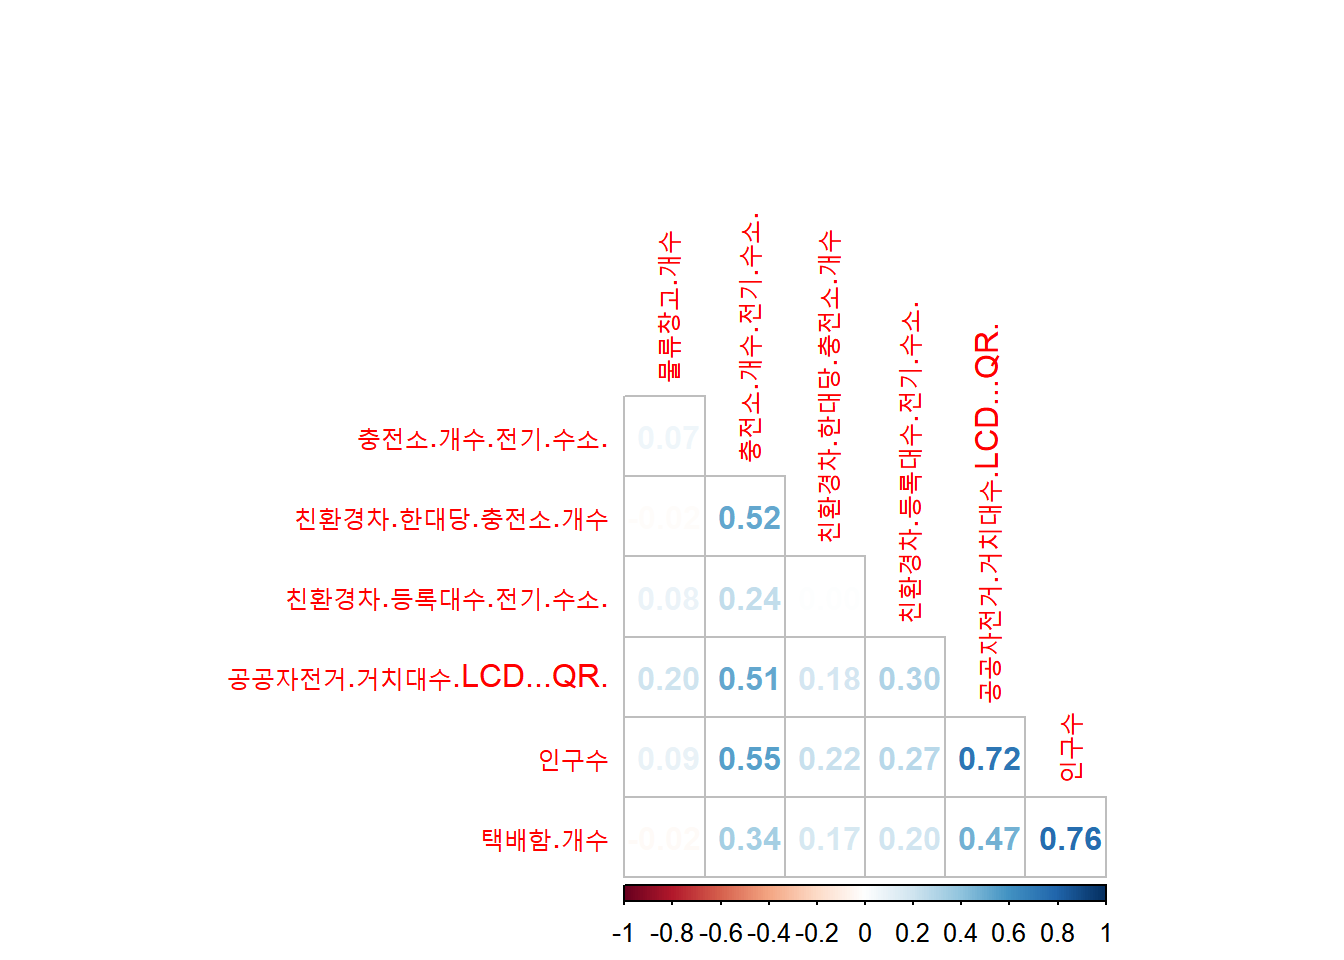

``` r
## 물류창고 수는 대부분의 지역이 적어서 클러스터링을 해도 유의미한 의미 x
## 인구수가 물류센터에 필요한 택배함 개수, 공공자전거 거치대수 충전소 개수와 높은 양의 상관관계를 보이고 있음
## 인구수와 각각 클러스터링을 하여 인구수는 많지만 해당 시설이 부족한 군집을 찾고
## 각 시설들이 필요한 군집들을 voting을 통해 법정동 선정
```

``` r
row.names(df6) <- df6$법정동
quantile(df6$인구수,probs=seq(0,1,0.01))
```

``` hljs
##        0%        1%        2%        3%        4%        5%        6%        7% 
##      1.00     33.84     76.36    156.38    240.80    588.70    824.00    852.00 
##        8%        9%       10%       11%       12%       13%       14%       15% 
##    873.68    930.86    959.80    992.20   1033.24   1082.48   1168.20   1297.10 
##       16%       17%       18%       19%       20%       21%       22%       23% 
##   1455.08   1574.94   1650.76   1710.68   1797.00   1838.42   2001.08   2130.38 
##       24%       25%       26%       27%       28%       29%       30%       31% 
##   2330.00   2481.00   2734.88   2970.60   3050.96   3192.32   3291.40   3595.44 
##       32%       33%       34%       35%       36%       37%       38%       39% 
##   3651.32   3747.62   3933.72   4059.20   4229.24   4586.44   4829.48   4984.50 
##       40%       41%       42%       43%       44%       45%       46%       47% 
##   5098.00   5612.00   5874.04   6166.38   6659.00   7123.20   7419.64   8040.40 
##       48%       49%       50%       51%       52%       53%       54%       55% 
##   8937.96   9372.96   9858.00  10648.52  10886.52  11661.80  12243.92  12826.50 
##       56%       57%       58%       59%       60%       61%       62%       63% 
##  13766.08  14470.64  14944.80  15939.34  16543.40  17869.62  18705.40  19672.72 
##       64%       65%       66%       67%       68%       69%       70%       71% 
##  22953.08  24667.60  25485.80  27637.04  29224.60  30312.36  31701.60  32964.40 
##       72%       73%       74%       75%       76%       77%       78%       79% 
##  35234.56  36247.82  37536.56  38255.00  41372.44  42572.24  43418.24  43941.94 
##       80%       81%       82%       83%       84%       85%       86%       87% 
##  45252.40  46065.30  47658.88  49035.58  51250.08  52491.00  54193.80  55838.38 
##       88%       89%       90%       91%       92%       93%       94%       95% 
##  63392.52  67660.76  70211.80  74033.80  78102.48  82232.58  87306.52 101357.90 
##       96%       97%       98%       99%      100% 
## 103691.24 114748.90 126808.32 182562.34 245562.00
```

``` r
df_name6 <- df6[,'법정동']

#인구수, 공공자전거 거치대수, 충전소 개수, 택배함 개수 적은 곳이 target
df5 <- df6[,c(2,3,5,7)]
str(df5)
```

``` hljs
## 'data.frame':    363 obs. of  4 variables:
##  $ 인구수                       : int  2339 1361 192 3206 1880 994 3193 2655 246 106 ...
##  $ 택배함.개수                  : int  0 0 1 0 0 0 0 0 0 0 ...
##  $ 공공자전거.거치대수.LCD...QR.: int  8 0 0 0 0 0 14 12 0 26 ...
##  $ 충전소.개수.전기.수소.       : int  0 0 0 0 0 0 4 2 1 0 ...
```

``` r
df5
```

``` hljs
##                      인구수 택배함.개수 공공자전거.거치대수.LCD...QR.
## 종로구 청운동          2339           0                             8
## 종로구 신교동          1361           0                             0
## 종로구 궁정동           192           1                             0
## 종로구 누상동          3206           0                             0
## 종로구 옥인동          1880           0                             0
## 종로구 필운동           994           0                             0
## 종로구 사직동          3193           0                            14
## 종로구 내수동          2655           0                            12
## 종로구 수송동           246           0                             0
## 종로구 와룡동           106           0                            26
## 종로구 익선동          1024           0                             0
## 종로구 관철동           236           0                             8
## 종로구 낙원동           852           0                            10
## 종로구 삼청동          1289           0                            15
## 종로구 소격동           128           0                            10
## 종로구 가회동          1045           0                            10
## 종로구 계동            1051           0                             0
## 종로구 원서동          1756           0                            10
## 종로구 종로3가          128           0                            45
## 종로구 인의동          1045           0                            22
## 종로구 연지동           874           0                            38
## 종로구 효제동           848           0                            10
## 종로구 이화동          1720           0                            10
## 종로구 연건동          1649           0                            30
## 종로구 충신동          2981           0                            16
## 종로구 동숭동          3677           0                            22
## 종로구 혜화동          3159           1                            38
## 종로구 명륜1가         4282           0                             0
## 종로구 명륜2가         3047           0                            33
## 종로구 명륜3가         4741           0                             0
## 종로구 창신동         18679           1                            78
## 종로구 숭인동         15578           2                            43
## 종로구 평동            1569           0                            15
## 종로구 송월동           921           0                             8
## 종로구 홍파동          1580           0                             0
## 종로구 교북동           890           0                            14
## 종로구 행촌동          4211           0                             0
## 종로구 구기동          5754           0                            18
## 종로구 평창동         11766           0                            20
## 종로구 부암동          4088           0                            20
## 종로구 홍지동          1586           0                            13
## 종로구 신영동          3494           0                            16
## 종로구 무악동          8008           0                            31
## 중구 다동                67           0                            10
## 중구 태평로1가            5           0                            20
## 중구 소공동               1           0                            10
## 중구 태평로2가           46           0                             0
## 중구 남대문로5가        713           0                            30
## 중구 회현동1가         3295           0                            24
## 중구 회현동2가          865           0                            10
## 중구 명동1가             11           0                             0
## 중구 남산동2가          532           1                             0
## 중구 남산동3가           50           0                             0
## 중구 충무로4가         1569           0                            12
## 중구 인현동2가          866           0                             0
## 중구 묵정동             916           0                             0
## 중구 필동2가            845           0                             0
## 중구 필동3가            938           0                             5
## 중구 예장동             770           0                             0
## 중구 장충동1가         1660           0                             6
## 중구 장충동2가         2941           2                            45
## 중구 광희동2가          852           0                            10
## 중구 을지로6가          163           0                            30
## 중구 을지로7가           58           0                            58
## 중구 을지로4가          161           0                            30
## 중구 신당동           68056           4                           117
## 중구 흥인동            2303           0                            22
## 중구 황학동           12818           0                            35
## 중구 순화동            1235           0                            37
## 중구 중림동            6074           0                            55
## 중구 만리동1가         1316           0                            13
## 중구 만리동2가         4562           0                            15
## 용산구 후암동         16201           0                            37
## 용산구 용산동2가       9008           1                            44
## 용산구 갈월동          2822           0                            27
## 용산구 남영동           580           1                             8
## 용산구 동자동          3621           0                            10
## 용산구 서계동          4899           0                            20
## 용산구 청파동1가       7273           1                            10
## 용산구 청파동2가       3286           0                            22
## 용산구 청파동3가       3597           0                            12
## 용산구 원효로1가       6927           0                             0
## 용산구 원효로2가       1706           0                            16
## 용산구 신창동          2308           1                             0
## 용산구 산천동          4980           0                             0
## 용산구 청암동           667           0                            30
## 용산구 원효로3가       2095           0                            30
## 용산구 원효로4가       3655           0                            45
## 용산구 효창동         10754           2                            20
## 용산구 도원동          5302           0                             0
## 용산구 용문동          6181           0                            22
## 용산구 문배동          5812           0                            34
## 용산구 신계동          2723           0                             0
## 용산구 한강로1가       3210           0                            65
## 용산구 한강로2가       7288           0                            93
## 용산구 용산동5가       2370           0                            40
## 용산구 한강로3가       8011           0                           119
## 용산구 이촌동         32942           0                           117
## 용산구 이태원동       14796           1                            61
## 용산구 한남동         19207           1                           115
## 용산구 동빙고동        6138           0                            12
## 용산구 서빙고동        5570           0                            35
## 용산구 보광동         12582           1                            10
## 성동구 상왕십리동      3632           0                            30
## 성동구 하왕십리동     30359           1                            58
## 성동구 홍익동          3942           0                            35
## 성동구 도선동          4703           0                             0
## 성동구 마장동         21971           0                            93
## 성동구 사근동          6791           1                             7
## 성동구 행당동         41999           2                           136
## 성동구 응봉동         14951           0                            31
## 성동구 금호동1가      14989           0                            10
## 성동구 금호동2가       9810           1                            34
## 성동구 금호동3가      12298           0                             9
## 성동구 금호동4가      14244           0                            57
## 성동구 옥수동         25503           0                            40
## 성동구 성수동1가      27759           2                           180
## 성동구 성수동2가      25213           2                           156
## 성동구 송정동         10073           0                            42
## 성동구 용답동         11743           1                            73
## 광진구 중곡동         80046           4                           107
## 광진구 능동           11163           0                           142
## 광진구 구의동         77349           3                           191
## 광진구 광장동         34062           0                           108
## 광진구 자양동         91273           5                           290
## 광진구 화양동         23379           1                           153
## 광진구 군자동         19286           1                           159
## 동대문구 신설동        3711           0                            43
## 동대문구 용두동       31682           1                           156
## 동대문구 제기동       24104           1                            94
## 동대문구 전농동       46855           1                           199
## 동대문구 답십리동     55766           2                            84
## 동대문구 장안동       70342           2                           113
## 동대문구 청량리동     18739           1                            72
## 동대문구 회기동       10496           1                            15
## 동대문구 휘경동       38456           1                           134
## 동대문구 이문동       37541           2                           112
## 중랑구 면목동        135903           3                           258
## 중랑구 상봉동         43594           2                           149
## 중랑구 중화동         43352           1                           138
## 중랑구 묵동           52337           0                           131
## 중랑구 망우동         51458           0                           118
## 중랑구 신내동         58223           0                           212
## 성북구 성북동         10323           0                            60
## 성북구 성북동1가       1859           0                            10
## 성북구 돈암동         38464           1                            38
## 성북구 동소문동1가      947           0                            13
## 성북구 동소문동4가     3027           0                            10
## 성북구 동소문동5가     1158           0                            10
## 성북구 동소문동6가     1809           0                            13
## 성북구 동소문동7가     2333           0                             0
## 성북구 삼선동1가       4268           0                             0
## 성북구 삼선동2가       5670           0                             0
## 성북구 삼선동3가       3812           0                             0
## 성북구 삼선동4가       3144           0                            30
## 성북구 삼선동5가       3773           0                            15
## 성북구 동선동1가       1173           0                            10
## 성북구 동선동2가       2177           0                            13
## 성북구 동선동3가       2879           0                            10
## 성북구 동선동4가       2114           0                             0
## 성북구 동선동5가       2031           0                             0
## 성북구 안암동1가       3933           0                            25
## 성북구 안암동2가       2373           0                            15
## 성북구 안암동3가       3726           0                            25
## 성북구 안암동4가        971           0                             8
## 성북구 안암동5가       4107           1                            46
## 성북구 보문동4가        958           0                             0
## 성북구 보문동5가       1812           0                             0
## 성북구 보문동6가       6196           1                             0
## 성북구 보문동7가        997           0                             0
## 성북구 보문동1가       1712           0                            12
## 성북구 보문동2가       2018           0                             0
## 성북구 보문동3가       2589           0                             8
## 성북구 정릉동         78690           1                            75
## 성북구 길음동         53989           1                            88
## 성북구 종암동         38054           0                            92
## 성북구 하월곡동       39615           0                            81
## 성북구 상월곡동        9205           0                            30
## 성북구 장위동         52895           2                           109
## 성북구 석관동         34286           1                            80
## 강북구 미아동        129120           2                           207
## 강북구 번동           49588           2                           200
## 강북구 수유동        102828           4                           191
## 강북구 우이동         10847           1                            45
## 도봉구 쌍문동         74086           0                           147
## 도봉구 방학동         73387           1                           186
## 도봉구 창동          116122           7                           343
## 도봉구 도봉동         46428           2                           169
## 노원구 월계동         75754           2                           282
## 노원구 공릉동         78078           3                           260
## 노원구 하계동         48387           0                           166
## 노원구 상계동        197531           4                           526
## 노원구 중계동        102088           0                           321
## 은평구 수색동         13152           0                            20
## 은평구 녹번동         36363           1                           103
## 은평구 불광동         64863           2                           157
## 은평구 갈현동         42832           3                            39
## 은평구 구산동         31731           1                            45
## 은평구 대조동         27312           0                            20
## 은평구 응암동         84329           0                           199
## 은평구 역촌동         44420           1                           127
## 은평구 신사동         45941           1                            59
## 은평구 증산동         18492           1                            45
## 은평구 진관동         54799           0                           320
## 서대문구 충정로2가     1140           0                             6
## 서대문구 충정로3가     5005           0                            41
## 서대문구 합동          1082           0                            17
## 서대문구 냉천동        3058           0                             0
## 서대문구 천연동        4588           0                             0
## 서대문구 옥천동         967           0                             0
## 서대문구 영천동        3014           0                             0
## 서대문구 현저동        5086           0                            15
## 서대문구 북아현동     27695           2                            54
## 서대문구 홍제동       55843           1                            61
## 서대문구 대현동        6640           0                            33
## 서대문구 대신동        1589           0                            25
## 서대문구 신촌동         846           1                            22
## 서대문구 창천동       10961           0                            93
## 서대문구 연희동       34320           2                           121
## 서대문구 홍은동       51165           3                           127
## 서대문구 북가좌동     48565           0                           183
## 서대문구 남가좌동     45963           4                           169
## 마포구 아현동         27807           0                            41
## 마포구 공덕동         25288           0                            80
## 마포구 신공덕동       12424           0                             5
## 마포구 도화동         21423           1                            36
## 마포구 용강동          7416           0                            26
## 마포구 토정동          1279           0                             0
## 마포구 마포동          2620           0                             0
## 마포구 대흥동         16473           2                            47
## 마포구 염리동         17976           0                            19
## 마포구 노고산동        5872           0                            54
## 마포구 신수동         15414           1                            70
## 마포구 현석동          5051           0                            15
## 마포구 창전동         14749           0                            55
## 마포구 상수동          7423           1                            25
## 마포구 하중동          1461           0                             0
## 마포구 신정동          1535           0                             0
## 마포구 당인동          1017           0                            10
## 마포구 서교동         19561           3                            68
## 마포구 동교동          3595           0                            72
## 마포구 합정동         16569           0                            74
## 마포구 망원동         37504           1                            62
## 마포구 연남동         14455           2                            35
## 마포구 성산동         47909           2                           274
## 마포구 중동            9731           0                            17
## 마포구 상암동         29976           2                           412
## 양천구 신정동        173388           2                           565
## 양천구 목동          145972           4                           511
## 양천구 신월동        119488           6                           297
## 강서구 염창동         41287           0                           140
## 강서구 등촌동         73996           0                           242
## 강서구 화곡동        219202          10                           271
## 강서구 가양동         43944           0                           258
## 강서구 마곡동         54629           1                          1263
## 강서구 내발산동       44728           1                           159
## 강서구 외발산동         948           0                            51
## 강서구 공항동         17754           0                           102
## 강서구 방화동         69691           1                           174
## 강서구 개화동          1684           0                            32
## 강서구 오곡동            14           1                             0
## 구로구 신도림동       35749           0                           100
## 구로구 구로동        115338           5                           488
## 구로구 가리봉동        8961           1                            10
## 구로구 고척동         51991           1                           109
## 구로구 개봉동         83359           0                           140
## 구로구 오류동         43841           1                           105
## 구로구 궁동           14050           2                            20
## 구로구 온수동          8865           0                            28
## 구로구 천왕동         16537           0                           148
## 구로구 항동           16408           0                           167
## 금천구 가산동         24472           0                           277
## 금천구 독산동        103061           4                           358
## 금천구 시흥동        101795           6                           210
## 영등포구 영등포동     13854           2                            75
## 영등포구 영등포동1가   3992           0                            24
## 영등포구 영등포동2가   4141           0                            10
## 영등포구 영등포동3가   1789           0                             0
## 영등포구 영등포동4가   1387           0                            36
## 영등포구 영등포동5가   1821           0                            10
## 영등포구 영등포동6가   1838           0                             0
## 영등포구 영등포동7가   9858           0                            44
## 영등포구 영등포동8가   4910           0                            45
## 영등포구 여의도동     32500           0                           754
## 영등포구 당산동1가     6652           1                            15
## 영등포구 당산동2가     5101           0                            15
## 영등포구 당산동3가     9073           0                            33
## 영등포구 당산동4가    12194           0                            80
## 영등포구 당산동5가    12903           0                            34
## 영등포구 당산동6가     3427           0                            20
## 영등포구 당산동        8221           1                            30
## 영등포구 도림동       17725           1                            50
## 영등포구 문래동2가     1090           0                             0
## 영등포구 문래동3가    13540           0                            59
## 영등포구 문래동4가     1971           0                            20
## 영등포구 문래동5가     4615           0                            12
## 영등포구 문래동6가    10742           0                            32
## 영등포구 양평동1가     4965           0                            42
## 영등포구 양평동2가     7145           0                            19
## 영등포구 양평동3가    12077           0                            65
## 영등포구 양평동4가     6677           0                            30
## 영등포구 양평동5가     5923           0                            40
## 영등포구 양평동6가     3963           0                            20
## 영등포구 신길동      104273           5                           286
## 영등포구 대림동       47812           2                           118
## 동작구 노량진동       31538           1                           101
## 동작구 상도동        114653           6                           105
## 동작구 상도1동         9647           0                            17
## 동작구 본동           10863           2                            45
## 동작구 흑석동         29211           0                           145
## 동작구 동작동          5560           0                            52
## 동작구 사당동         97424           4                           177
## 동작구 대방동         35941           0                           135
## 동작구 신대방동       45548           1                           135
## 관악구 봉천동        224184           6                           473
## 관악구 신림동        245562           9                           445
## 관악구 남현동         17895           1                            20
## 서초구 방배동         96378           2                           296
## 서초구 양재동         35850           0                           270
## 서초구 우면동         27569           1                           117
## 서초구 원지동           258           2                            35
## 서초구 잠원동         49996           0                           177
## 서초구 반포동         68780           2                           268
## 서초구 서초동        108370           0                           392
## 서초구 내곡동          8349           0                            71
## 서초구 염곡동           984           0                            40
## 서초구 신원동          8005           0                            83
## 강남구 역삼동         71237           2                           253
## 강남구 개포동         67574           0                           231
## 강남구 청담동         25124           0                            62
## 강남구 삼성동         43049           0                           241
## 강남구 대치동         79443           2                           224
## 강남구 신사동         11037           2                            92
## 강남구 논현동         42047           1                           134
## 강남구 압구정동       30147           0                            44
## 강남구 세곡동         14501           0                            80
## 강남구 자곡동         25602           0                            64
## 강남구 율현동          3851           0                            41
## 강남구 일원동         45662           1                            92
## 강남구 수서동         22048           0                            63
## 강남구 도곡동         53324           2                           155
## 송파구 잠실동        106214           0                           359
## 송파구 신천동         37729           0                           211
## 송파구 풍납동         36253           0                           142
## 송파구 송파동         42257           1                            95
## 송파구 석촌동         31019           1                            58
## 송파구 삼전동         29296           2                            70
## 송파구 가락동         84418           1                           294
## 송파구 문정동         61521           1                           346
## 송파구 장지동         43536           1                           220
## 송파구 방이동         58954           1                           367
## 송파구 오금동         37664           0                           183
## 송파구 거여동         52557           2                           178
## 송파구 마천동         36246           1                            80
## 강동구 명일동         42683           1                           148
## 강동구 고덕동         46595           0                           163
## 강동구 상일동         51232           0                           228
## 강동구 길동           44809           1                            90
## 강동구 둔촌동         24160           0                           178
## 강동구 암사동         66418           2                           138
## 강동구 성내동         65051           3                           238
## 강동구 천호동         85764           4                           183
## 강동구 강일동         32855           0                           145
##                      충전소.개수.전기.수소.
## 종로구 청운동                             0
## 종로구 신교동                             0
## 종로구 궁정동                             0
## 종로구 누상동                             0
## 종로구 옥인동                             0
## 종로구 필운동                             0
## 종로구 사직동                             4
## 종로구 내수동                             2
## 종로구 수송동                             1
## 종로구 와룡동                             0
## 종로구 익선동                             0
## 종로구 관철동                             3
## 종로구 낙원동                             0
## 종로구 삼청동                             0
## 종로구 소격동                             2
## 종로구 가회동                             0
## 종로구 계동                               0
## 종로구 원서동                             0
## 종로구 종로3가                            2
## 종로구 인의동                             0
## 종로구 연지동                             0
## 종로구 효제동                             0
## 종로구 이화동                             0
## 종로구 연건동                             6
## 종로구 충신동                             0
## 종로구 동숭동                             0
## 종로구 혜화동                             3
## 종로구 명륜1가                            0
## 종로구 명륜2가                            0
## 종로구 명륜3가                            0
## 종로구 창신동                             7
## 종로구 숭인동                             1
## 종로구 평동                               0
## 종로구 송월동                             0
## 종로구 홍파동                             0
## 종로구 교북동                             0
## 종로구 행촌동                             0
## 종로구 구기동                             1
## 종로구 평창동                             0
## 종로구 부암동                             0
## 종로구 홍지동                             0
## 종로구 신영동                             0
## 종로구 무악동                             6
## 중구 다동                                 3
## 중구 태평로1가                            2
## 중구 소공동                               0
## 중구 태평로2가                            7
## 중구 남대문로5가                          0
## 중구 회현동1가                            1
## 중구 회현동2가                            3
## 중구 명동1가                              3
## 중구 남산동2가                            3
## 중구 남산동3가                            0
## 중구 충무로4가                            2
## 중구 인현동2가                            0
## 중구 묵정동                               2
## 중구 필동2가                              0
## 중구 필동3가                              0
## 중구 예장동                               0
## 중구 장충동1가                            0
## 중구 장충동2가                            3
## 중구 광희동2가                            0
## 중구 을지로6가                            0
## 중구 을지로7가                            2
## 중구 을지로4가                            0
## 중구 신당동                              10
## 중구 흥인동                               0
## 중구 황학동                               4
## 중구 순화동                               2
## 중구 중림동                               0
## 중구 만리동1가                            2
## 중구 만리동2가                            0
## 용산구 후암동                             0
## 용산구 용산동2가                         10
## 용산구 갈월동                             0
## 용산구 남영동                             0
## 용산구 동자동                             0
## 용산구 서계동                             0
## 용산구 청파동1가                          0
## 용산구 청파동2가                          0
## 용산구 청파동3가                          0
## 용산구 원효로1가                          4
## 용산구 원효로2가                          0
## 용산구 신창동                             0
## 용산구 산천동                             0
## 용산구 청암동                             3
## 용산구 원효로3가                          0
## 용산구 원효로4가                          0
## 용산구 효창동                             0
## 용산구 도원동                             0
## 용산구 용문동                             0
## 용산구 문배동                             8
## 용산구 신계동                             0
## 용산구 한강로1가                          6
## 용산구 한강로2가                          0
## 용산구 용산동5가                          4
## 용산구 한강로3가                          2
## 용산구 이촌동                            13
## 용산구 이태원동                           0
## 용산구 한남동                             2
## 용산구 동빙고동                           0
## 용산구 서빙고동                           0
## 용산구 보광동                             0
## 성동구 상왕십리동                         7
## 성동구 하왕십리동                         7
## 성동구 홍익동                             0
## 성동구 도선동                             0
## 성동구 마장동                             8
## 성동구 사근동                             2
## 성동구 행당동                             7
## 성동구 응봉동                             0
## 성동구 금호동1가                          4
## 성동구 금호동2가                          3
## 성동구 금호동3가                          0
## 성동구 금호동4가                          2
## 성동구 옥수동                             0
## 성동구 성수동1가                         15
## 성동구 성수동2가                          9
## 성동구 송정동                             0
## 성동구 용답동                             2
## 광진구 중곡동                             1
## 광진구 능동                               0
## 광진구 구의동                            14
## 광진구 광장동                             5
## 광진구 자양동                             3
## 광진구 화양동                             0
## 광진구 군자동                             0
## 동대문구 신설동                           0
## 동대문구 용두동                           0
## 동대문구 제기동                           0
## 동대문구 전농동                          10
## 동대문구 답십리동                         6
## 동대문구 장안동                           3
## 동대문구 청량리동                         0
## 동대문구 회기동                           2
## 동대문구 휘경동                          11
## 동대문구 이문동                           3
## 중랑구 면목동                             8
## 중랑구 상봉동                             8
## 중랑구 중화동                             9
## 중랑구 묵동                               7
## 중랑구 망우동                             5
## 중랑구 신내동                             6
## 성북구 성북동                             0
## 성북구 성북동1가                          0
## 성북구 돈암동                            10
## 성북구 동소문동1가                        0
## 성북구 동소문동4가                        0
## 성북구 동소문동5가                        0
## 성북구 동소문동6가                        0
## 성북구 동소문동7가                        1
## 성북구 삼선동1가                          0
## 성북구 삼선동2가                          7
## 성북구 삼선동3가                          3
## 성북구 삼선동4가                          0
## 성북구 삼선동5가                          0
## 성북구 동선동1가                          0
## 성북구 동선동2가                          0
## 성북구 동선동3가                          0
## 성북구 동선동4가                          0
## 성북구 동선동5가                          0
## 성북구 안암동1가                          0
## 성북구 안암동2가                          0
## 성북구 안암동3가                          0
## 성북구 안암동4가                          0
## 성북구 안암동5가                          4
## 성북구 보문동4가                          0
## 성북구 보문동5가                          0
## 성북구 보문동6가                          1
## 성북구 보문동7가                          0
## 성북구 보문동1가                          0
## 성북구 보문동2가                          0
## 성북구 보문동3가                          0
## 성북구 정릉동                            12
## 성북구 길음동                             5
## 성북구 종암동                             1
## 성북구 하월곡동                           6
## 성북구 상월곡동                           4
## 성북구 장위동                             3
## 성북구 석관동                            12
## 강북구 미아동                            22
## 강북구 번동                               5
## 강북구 수유동                             1
## 강북구 우이동                             0
## 도봉구 쌍문동                             4
## 도봉구 방학동                            30
## 도봉구 창동                              34
## 도봉구 도봉동                             7
## 노원구 월계동                             7
## 노원구 공릉동                            32
## 노원구 하계동                             5
## 노원구 상계동                            26
## 노원구 중계동                            27
## 은평구 수색동                             0
## 은평구 녹번동                             1
## 은평구 불광동                             0
## 은평구 갈현동                             0
## 은평구 구산동                             0
## 은평구 대조동                             0
## 은평구 응암동                             2
## 은평구 역촌동                             2
## 은평구 신사동                             0
## 은평구 증산동                             0
## 은평구 진관동                            12
## 서대문구 충정로2가                        0
## 서대문구 충정로3가                        0
## 서대문구 합동                             0
## 서대문구 냉천동                           2
## 서대문구 천연동                           0
## 서대문구 옥천동                           0
## 서대문구 영천동                           0
## 서대문구 현저동                           0
## 서대문구 북아현동                         0
## 서대문구 홍제동                           6
## 서대문구 대현동                           0
## 서대문구 대신동                           5
## 서대문구 신촌동                           0
## 서대문구 창천동                           0
## 서대문구 연희동                           5
## 서대문구 홍은동                           1
## 서대문구 북가좌동                         6
## 서대문구 남가좌동                         8
## 마포구 아현동                            18
## 마포구 공덕동                             5
## 마포구 신공덕동                           6
## 마포구 도화동                             2
## 마포구 용강동                             4
## 마포구 토정동                             0
## 마포구 마포동                             3
## 마포구 대흥동                             1
## 마포구 염리동                            15
## 마포구 노고산동                           2
## 마포구 신수동                             0
## 마포구 현석동                             0
## 마포구 창전동                             1
## 마포구 상수동                             7
## 마포구 하중동                             0
## 마포구 신정동                            24
## 마포구 당인동                             0
## 마포구 서교동                             4
## 마포구 동교동                             0
## 마포구 합정동                            10
## 마포구 망원동                             0
## 마포구 연남동                             1
## 마포구 성산동                            12
## 마포구 중동                               0
## 마포구 상암동                             4
## 양천구 신정동                             0
## 양천구 목동                              17
## 양천구 신월동                            13
## 강서구 염창동                             0
## 강서구 등촌동                             5
## 강서구 화곡동                             2
## 강서구 가양동                             2
## 강서구 마곡동                             3
## 강서구 내발산동                           6
## 강서구 외발산동                           0
## 강서구 공항동                             0
## 강서구 방화동                             9
## 강서구 개화동                             1
## 강서구 오곡동                             1
## 구로구 신도림동                           7
## 구로구 구로동                            17
## 구로구 가리봉동                           1
## 구로구 고척동                            18
## 구로구 개봉동                             4
## 구로구 오류동                             5
## 구로구 궁동                               0
## 구로구 온수동                             0
## 구로구 천왕동                            11
## 구로구 항동                              10
## 금천구 가산동                             1
## 금천구 독산동                             4
## 금천구 시흥동                             5
## 영등포구 영등포동                         0
## 영등포구 영등포동1가                      3
## 영등포구 영등포동2가                      3
## 영등포구 영등포동3가                      0
## 영등포구 영등포동4가                      0
## 영등포구 영등포동5가                      0
## 영등포구 영등포동6가                      0
## 영등포구 영등포동7가                      0
## 영등포구 영등포동8가                      0
## 영등포구 여의도동                        21
## 영등포구 당산동1가                        0
## 영등포구 당산동2가                        3
## 영등포구 당산동3가                        5
## 영등포구 당산동4가                        2
## 영등포구 당산동5가                        0
## 영등포구 당산동6가                        0
## 영등포구 당산동                           0
## 영등포구 도림동                           4
## 영등포구 문래동2가                        0
## 영등포구 문래동3가                       23
## 영등포구 문래동4가                        0
## 영등포구 문래동5가                        0
## 영등포구 문래동6가                        0
## 영등포구 양평동1가                        0
## 영등포구 양평동2가                        0
## 영등포구 양평동3가                        0
## 영등포구 양평동4가                        0
## 영등포구 양평동5가                        2
## 영등포구 양평동6가                        0
## 영등포구 신길동                          16
## 영등포구 대림동                           7
## 동작구 노량진동                           0
## 동작구 상도동                             9
## 동작구 상도1동                            0
## 동작구 본동                               0
## 동작구 흑석동                             4
## 동작구 동작동                             2
## 동작구 사당동                             8
## 동작구 대방동                            17
## 동작구 신대방동                           0
## 관악구 봉천동                            13
## 관악구 신림동                            15
## 관악구 남현동                             0
## 서초구 방배동                            23
## 서초구 양재동                             1
## 서초구 우면동                            20
## 서초구 원지동                             0
## 서초구 잠원동                             2
## 서초구 반포동                            14
## 서초구 서초동                            35
## 서초구 내곡동                             6
## 서초구 염곡동                             4
## 서초구 신원동                             4
## 강남구 역삼동                            23
## 강남구 개포동                             4
## 강남구 청담동                             6
## 강남구 삼성동                            18
## 강남구 대치동                            10
## 강남구 신사동                             2
## 강남구 논현동                             4
## 강남구 압구정동                           0
## 강남구 세곡동                             8
## 강남구 자곡동                            15
## 강남구 율현동                             8
## 강남구 일원동                             8
## 강남구 수서동                             0
## 강남구 도곡동                            17
## 송파구 잠실동                            21
## 송파구 신천동                             6
## 송파구 풍납동                             6
## 송파구 송파동                             7
## 송파구 석촌동                             0
## 송파구 삼전동                             1
## 송파구 가락동                            14
## 송파구 문정동                             4
## 송파구 장지동                            43
## 송파구 방이동                             3
## 송파구 오금동                             2
## 송파구 거여동                            16
## 송파구 마천동                             7
## 강동구 명일동                             5
## 강동구 고덕동                             4
## 강동구 상일동                            11
## 강동구 길동                               9
## 강동구 둔촌동                            12
## 강동구 암사동                            10
## 강동구 성내동                            14
## 강동구 천호동                             7
## 강동구 강일동                            14
```

``` r
min_max_scaling <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}

# 데이터프레임의 모든 열에 Min-Max 스케일링 적용
scaled_final <- as.data.frame(lapply(df5, min_max_scaling))
row.names(scaled_final) <- row.names(df5)
str(scaled_final)
```

``` hljs
## 'data.frame':    363 obs. of  4 variables:
##  $ 인구수                       : num  0.009521 0.005538 0.000778 0.013052 0.007652 ...
##  $ 택배함.개수                  : num  0 0 0.1 0 0 0 0 0 0 0 ...
##  $ 공공자전거.거치대수.LCD...QR.: num  0.00633 0 0 0 0 ...
##  $ 충전소.개수.전기.수소.       : num  0 0 0 0 0 ...
```

``` r
scaled_final
```

``` hljs
##                            인구수 택배함.개수 공공자전거.거치대수.LCD...QR.
## 종로구 청운동        9.521056e-03         0.0                   0.006334125
## 종로구 신교동        5.538339e-03         0.0                   0.000000000
## 종로구 궁정동        7.778108e-04         0.1                   0.000000000
## 종로구 누상동        1.305175e-02         0.0                   0.000000000
## 종로구 옥인동        7.651867e-03         0.0                   0.000000000
## 종로구 필운동        4.043802e-03         0.0                   0.000000000
## 종로구 사직동        1.299881e-02         0.0                   0.011084719
## 종로구 내수동        1.080791e-02         0.0                   0.009501188
## 종로구 수송동        9.977154e-04         0.0                   0.000000000
## 종로구 와룡동        4.275923e-04         0.0                   0.020585907
## 종로구 익선동        4.165971e-03         0.0                   0.000000000
## 종로구 관철동        9.569924e-04         0.0                   0.006334125
## 종로구 낙원동        3.465534e-03         0.0                   0.007917656
## 종로구 삼청동        5.245133e-03         0.0                   0.011876485
## 종로구 소격동        5.171831e-04         0.0                   0.007917656
## 종로구 가회동        4.251489e-03         0.0                   0.007917656
## 종로구 계동          4.275923e-03         0.0                   0.000000000
## 종로구 원서동        7.146900e-03         0.0                   0.007917656
## 종로구 종로3가       5.171831e-04         0.0                   0.035629454
## 종로구 인의동        4.251489e-03         0.0                   0.017418844
## 종로구 연지동        3.555125e-03         0.0                   0.030087094
## 종로구 효제동        3.449245e-03         0.0                   0.007917656
## 종로구 이화동        7.000297e-03         0.0                   0.007917656
## 종로구 연건동        6.711163e-03         0.0                   0.023752969
## 종로구 충신동        1.213548e-02         0.0                   0.012668250
## 종로구 동숭동        1.496980e-02         0.0                   0.017418844
## 종로구 혜화동        1.286035e-02         0.1                   0.030087094
## 종로구 명륜1가       1.743355e-02         0.0                   0.000000000
## 종로구 명륜2가       1.240425e-02         0.0                   0.026128266
## 종로구 명륜3가       1.930274e-02         0.0                   0.000000000
## 종로구 창신동        7.606257e-02         0.1                   0.061757720
## 종로구 숭인동        6.343434e-02         0.2                   0.034045922
## 종로구 평동          6.385379e-03         0.0                   0.011876485
## 종로구 송월동        3.746523e-03         0.0                   0.006334125
## 종로구 홍파동        6.430174e-03         0.0                   0.000000000
## 종로구 교북동        3.620282e-03         0.0                   0.011084719
## 종로구 행촌동        1.714442e-02         0.0                   0.000000000
## 종로구 구기동        2.342799e-02         0.0                   0.014251781
## 종로구 평창동        4.791070e-02         0.0                   0.015835313
## 종로구 부암동        1.664352e-02         0.0                   0.015835313
## 종로구 홍지동        6.454608e-03         0.0                   0.010292953
## 종로구 신영동        1.422457e-02         0.0                   0.012668250
## 종로구 무악동        3.260697e-02         0.0                   0.024544735
## 중구 다동            2.687723e-04         0.0                   0.007917656
## 중구 태평로1가       1.628923e-05         0.0                   0.015835313
## 중구 소공동          0.000000e+00         0.0                   0.007917656
## 중구 태평로2가       1.832539e-04         0.0                   0.000000000
## 중구 남대문로5가     2.899483e-03         0.0                   0.023752969
## 중구 회현동1가       1.341418e-02         0.0                   0.019002375
## 중구 회현동2가       3.518474e-03         0.0                   0.007917656
## 중구 명동1가         4.072308e-05         0.0                   0.000000000
## 중구 남산동2가       2.162395e-03         0.1                   0.000000000
## 중구 남산동3가       1.995431e-04         0.0                   0.000000000
## 중구 충무로4가       6.385379e-03         0.0                   0.009501188
## 중구 인현동2가       3.522546e-03         0.0                   0.000000000
## 중구 묵정동          3.726162e-03         0.0                   0.000000000
## 중구 필동2가         3.437028e-03         0.0                   0.000000000
## 중구 필동3가         3.815753e-03         0.0                   0.003958828
## 중구 예장동          3.131605e-03         0.0                   0.000000000
## 중구 장충동1가       6.755959e-03         0.0                   0.004750594
## 중구 장충동2가       1.197259e-02         0.2                   0.035629454
## 중구 광희동2가       3.465534e-03         0.0                   0.007917656
## 중구 을지로6가       6.597139e-04         0.0                   0.023752969
## 중구 을지로7가       2.321216e-04         0.0                   0.045922407
## 중구 을지로4가       6.515693e-04         0.0                   0.023752969
## 중구 신당동          2.771409e-01         0.4                   0.092636580
## 중구 흥인동          9.374453e-03         0.0                   0.017418844
## 중구 황학동          5.219477e-02         0.0                   0.027711797
## 중구 순화동          5.025228e-03         0.0                   0.029295329
## 중구 중림동          2.473113e-02         0.0                   0.043547110
## 중구 만리동1가       5.355085e-03         0.0                   0.010292953
## 중구 만리동2가       1.857380e-02         0.0                   0.011876485
## 용산구 후암동        6.597139e-02         0.0                   0.029295329
## 용산구 용산동2가     3.667928e-02         0.1                   0.034837688
## 용산구 갈월동        1.148798e-02         0.0                   0.021377672
## 용산구 남영동        2.357866e-03         0.1                   0.006334125
## 용산구 동자동        1.474175e-02         0.0                   0.007917656
## 용산구 서계동        1.994616e-02         0.0                   0.015835313
## 용산구 청파동1가     2.961382e-02         0.1                   0.007917656
## 용산구 청파동2가     1.337753e-02         0.0                   0.017418844
## 용산구 청파동3가     1.464402e-02         0.0                   0.009501188
## 용산구 원효로1가     2.820480e-02         0.0                   0.000000000
## 용산구 원효로2가     6.943285e-03         0.0                   0.012668250
## 용산구 신창동        9.394814e-03         0.1                   0.000000000
## 용산구 산천동        2.027602e-02         0.0                   0.000000000
## 용산구 청암동        2.712157e-03         0.0                   0.023752969
## 용산구 원효로3가     8.527413e-03         0.0                   0.023752969
## 용산구 원효로4가     1.488021e-02         0.0                   0.035629454
## 용산구 효창동        4.378953e-02         0.2                   0.015835313
## 용산구 도원동        2.158730e-02         0.0                   0.000000000
## 용산구 용문동        2.516686e-02         0.0                   0.017418844
## 용산구 문배동        2.366418e-02         0.0                   0.026920032
## 용산구 신계동        1.108482e-02         0.0                   0.000000000
## 용산구 한강로1가     1.306804e-02         0.0                   0.051464766
## 용산구 한강로2가     2.967491e-02         0.0                   0.073634204
## 용산구 용산동5가     9.647297e-03         0.0                   0.031670625
## 용산구 한강로3가     3.261919e-02         0.0                   0.094220111
## 용산구 이촌동        1.341459e-01         0.0                   0.092636580
## 용산구 이태원동      6.024980e-02         0.1                   0.048297704
## 용산구 한남동        7.821275e-02         0.1                   0.091053048
## 용산구 동빙고동      2.499175e-02         0.0                   0.009501188
## 용산구 서빙고동      2.267868e-02         0.0                   0.027711797
## 용산구 보광동        5.123371e-02         0.1                   0.007917656
## 성동구 상왕십리동    1.478655e-02         0.0                   0.023752969
## 성동구 하왕십리동    1.236271e-01         0.1                   0.045922407
## 성동구 홍익동        1.604897e-02         0.0                   0.027711797
## 성동구 도선동        1.914799e-02         0.0                   0.000000000
## 성동구 마장동        8.946860e-02         0.0                   0.073634204
## 성동구 사근동        2.765097e-02         0.1                   0.005542359
## 성동구 행당동        1.710288e-01         0.2                   0.107680127
## 성동구 응봉동        6.088100e-02         0.0                   0.024544735
## 성동구 금호동1가     6.103575e-02         0.0                   0.007917656
## 성동구 금호동2가     3.994527e-02         0.1                   0.026920032
## 성동구 금호동3가     5.007717e-02         0.0                   0.007125891
## 성동구 금호동4가     5.800188e-02         0.0                   0.045130641
## 성동구 옥수동        1.038520e-01         0.0                   0.031670625
## 성동구 성수동1가     1.130391e-01         0.2                   0.142517815
## 성동구 성수동2가     1.026710e-01         0.2                   0.123515439
## 성동구 송정동        4.101629e-02         0.0                   0.033254157
## 성동구 용답동        4.781704e-02         0.1                   0.057798892
## 광진구 중곡동        3.259679e-01         0.4                   0.084718923
## 광진구 능동          4.545510e-02         0.0                   0.112430721
## 광진구 구의동        3.149849e-01         0.3                   0.151227237
## 광진구 광장동        1.387069e-01         0.0                   0.085510689
## 광진구 자양동        3.716877e-01         0.5                   0.229612035
## 광진구 화양동        9.520241e-02         0.1                   0.121140143
## 광진구 군자동        7.853446e-02         0.1                   0.125890736
## 동대문구 신설동      1.510826e-02         0.0                   0.034045922
## 동대문구 용두동      1.290148e-01         0.1                   0.123515439
## 동대문구 제기동      9.815484e-02         0.1                   0.074425970
## 동대문구 전농동      1.908039e-01         0.1                   0.157561362
## 동대문구 답십리동    2.270922e-01         0.2                   0.066508314
## 동대문구 장안동      2.864502e-01         0.2                   0.089469517
## 동대문구 청량리동    7.630691e-02         0.1                   0.057007126
## 동대문구 회기동      4.273887e-02         0.1                   0.011876485
## 동대문구 휘경동      1.566006e-01         0.1                   0.106096595
## 동대문구 이문동      1.528744e-01         0.2                   0.088677751
## 중랑구 면목동        5.534348e-01         0.3                   0.204275534
## 중랑구 상봉동        1.775241e-01         0.2                   0.117973080
## 중랑구 중화동        1.765386e-01         0.1                   0.109263658
## 중랑구 묵동          2.131283e-01         0.0                   0.103721298
## 중랑구 망우동        2.095487e-01         0.0                   0.093428345
## 중랑구 신내동        2.370979e-01         0.0                   0.167854315
## 성북구 성북동        4.203436e-02         0.0                   0.047505938
## 성북구 성북동1가     7.566348e-03         0.0                   0.007917656
## 성북구 돈암동        1.566332e-01         0.1                   0.030087094
## 성북구 동소문동1가   3.852403e-03         0.0                   0.010292953
## 성북구 동소문동4가   1.232280e-02         0.0                   0.007917656
## 성북구 동소문동5가   4.711660e-03         0.0                   0.007917656
## 성북구 동소문동6가   7.362733e-03         0.0                   0.010292953
## 성북구 동소문동7가   9.496622e-03         0.0                   0.000000000
## 성북구 삼선동1가     1.737654e-02         0.0                   0.000000000
## 성북구 삼선동2가     2.308591e-02         0.0                   0.000000000
## 성북구 삼선동3가     1.551957e-02         0.0                   0.000000000
## 성북구 삼선동4가     1.279926e-02         0.0                   0.023752969
## 성북구 삼선동5가     1.536075e-02         0.0                   0.011876485
## 성북구 동선동1가     4.772745e-03         0.0                   0.007917656
## 성북구 동선동2가     8.861342e-03         0.0                   0.010292953
## 성북구 동선동3가     1.172010e-02         0.0                   0.007917656
## 성북구 동선동4가     8.604787e-03         0.0                   0.000000000
## 성북구 동선동5가     8.266785e-03         0.0                   0.000000000
## 성북구 안암동1가     1.601231e-02         0.0                   0.019794141
## 성북구 안암동2가     9.659514e-03         0.0                   0.011876485
## 성북구 안암동3가     1.516935e-02         0.0                   0.019794141
## 성북구 안암동4가     3.950139e-03         0.0                   0.006334125
## 성북구 안암동5가     1.672090e-02         0.1                   0.036421219
## 성북구 보문동4가     3.897199e-03         0.0                   0.000000000
## 성북구 보문동5가     7.374950e-03         0.0                   0.000000000
## 성북구 보문동6가     2.522795e-02         0.1                   0.000000000
## 성북구 보문동7가     4.056019e-03         0.0                   0.000000000
## 성북구 보문동1가     6.967719e-03         0.0                   0.009501188
## 성북구 보문동2가     8.213845e-03         0.0                   0.000000000
## 성북구 보문동3가     1.053913e-02         0.0                   0.006334125
## 성북구 정릉동        3.204458e-01         0.1                   0.059382423
## 성북구 길음동        2.198558e-01         0.1                   0.069675376
## 성북구 종암동        1.549635e-01         0.0                   0.072842439
## 성북구 하월곡동      1.613204e-01         0.0                   0.064133017
## 성북구 상월곡동      3.748152e-02         0.0                   0.023752969
## 성북구 장위동        2.154007e-01         0.2                   0.086302454
## 성북구 석관동        1.396191e-01         0.1                   0.063341251
## 강북구 미아동        5.258123e-01         0.2                   0.163895487
## 강북구 번동          2.019335e-01         0.2                   0.158353127
## 강북구 수유동        4.187432e-01         0.4                   0.151227237
## 강북구 우이동        4.416825e-02         0.1                   0.035629454
## 도봉구 쌍문동        3.016969e-01         0.0                   0.116389549
## 도봉구 방학동        2.988504e-01         0.1                   0.147268409
## 도봉구 창동          4.728805e-01         0.7                   0.271575614
## 도봉구 도봉동        1.890650e-01         0.2                   0.133808393
## 노원구 월계동        3.084895e-01         0.2                   0.223277910
## 노원구 공릉동        3.179536e-01         0.3                   0.205859066
## 노원구 하계동        1.970427e-01         0.0                   0.131433096
## 노원구 상계동        8.044030e-01         0.4                   0.416468725
## 노원구 중계동        4.157297e-01         0.0                   0.254156770
## 은평구 수색동        5.355492e-02         0.0                   0.015835313
## 은평구 녹번동        1.480773e-01         0.1                   0.081551861
## 은평구 불광동        2.641380e-01         0.2                   0.124307205
## 은평구 갈현동        1.744210e-01         0.3                   0.030878860
## 은평구 구산동        1.292143e-01         0.1                   0.035629454
## 은평구 대조동        1.112188e-01         0.0                   0.015835313
## 은평구 응암동        3.434096e-01         0.0                   0.157561362
## 은평구 역촌동        1.808878e-01         0.1                   0.100554236
## 은평구 신사동        1.870818e-01         0.1                   0.046714173
## 은평구 증산동        7.530105e-02         0.1                   0.035629454
## 은평구 진관동        2.231543e-01         0.0                   0.253365004
## 서대문구 충정로2가   4.638359e-03         0.0                   0.004750594
## 서대문구 충정로3가   2.037783e-02         0.0                   0.032462391
## 서대문구 합동        4.402165e-03         0.0                   0.013460016
## 서대문구 냉천동      1.244905e-02         0.0                   0.000000000
## 서대문구 천연동      1.867968e-02         0.0                   0.000000000
## 서대문구 옥천동      3.933849e-03         0.0                   0.000000000
## 서대문구 영천동      1.226986e-02         0.0                   0.000000000
## 서대문구 현저동      2.070769e-02         0.0                   0.011876485
## 서대문구 북아현동    1.127785e-01         0.2                   0.042755344
## 서대문구 홍제동      2.274058e-01         0.1                   0.048297704
## 서대문구 대현동      2.703605e-02         0.0                   0.026128266
## 서대문구 대신동      6.466825e-03         0.0                   0.019794141
## 서대문구 신촌동      3.441100e-03         0.1                   0.017418844
## 서대문구 창천동      4.463249e-02         0.0                   0.073634204
## 서대문구 연희동      1.397575e-01         0.2                   0.095803642
## 서대문구 홍은동      2.083556e-01         0.3                   0.100554236
## 서대문구 북가좌동    1.977676e-01         0.0                   0.144893112
## 서대문구 남가좌동    1.871714e-01         0.4                   0.133808393
## 마포구 아현동        1.132346e-01         0.0                   0.032462391
## 마포구 공덕동        1.029764e-01         0.0                   0.063341251
## 마포구 신공덕동      5.059028e-02         0.0                   0.003958828
## 마포구 도화동        8.723698e-02         0.1                   0.028503563
## 마포구 용강동        3.019616e-02         0.0                   0.020585907
## 마포구 토정동        5.204409e-03         0.0                   0.000000000
## 마포구 마포동        1.066537e-02         0.0                   0.000000000
## 마포구 대흥동        6.707906e-02         0.2                   0.037212985
## 마포구 염리동        7.319973e-02         0.0                   0.015043547
## 마포구 노고산동      2.390852e-02         0.0                   0.042755344
## 마포구 신수동        6.276648e-02         0.1                   0.055423595
## 마포구 현석동        2.056515e-02         0.0                   0.011876485
## 마포구 창전동        6.005840e-02         0.0                   0.043547110
## 마포구 상수동        3.022467e-02         0.1                   0.019794141
## 마포구 하중동        5.945570e-03         0.0                   0.000000000
## 마포구 신정동        6.246920e-03         0.0                   0.000000000
## 마포구 당인동        4.137465e-03         0.0                   0.007917656
## 마포구 서교동        7.965434e-02         0.3                   0.053840063
## 마포구 동교동        1.463587e-02         0.0                   0.057007126
## 마포구 합정동        6.747000e-02         0.0                   0.058590657
## 마포구 망원동        1.527238e-01         0.1                   0.049089470
## 마포구 연남동        5.886114e-02         0.2                   0.027711797
## 마포구 성산동        1.950961e-01         0.2                   0.216943785
## 마포구 중동          3.962356e-02         0.0                   0.013460016
## 마포구 상암동        1.220674e-01         0.2                   0.326207443
## 양천구 신정동        7.060852e-01         0.2                   0.447347585
## 양천구 목동          5.944389e-01         0.4                   0.404592241
## 양천구 신월동        4.865879e-01         0.6                   0.235154394
## 강서구 염창동        1.681293e-01         0.0                   0.110847189
## 강서구 등촌동        3.013304e-01         0.0                   0.191607284
## 강서구 화곡동        8.926540e-01         1.0                   0.214568488
## 강서구 가양동        1.789494e-01         0.0                   0.204275534
## 강서구 마곡동        2.224620e-01         0.1                   1.000000000
## 강서구 내발산동      1.821421e-01         0.1                   0.125890736
## 강서구 외발산동      3.856476e-03         0.0                   0.040380048
## 강서구 공항동        7.229568e-02         0.0                   0.080760095
## 강서구 방화동        2.837991e-01         0.1                   0.137767221
## 강서구 개화동        6.853694e-03         0.0                   0.025336500
## 강서구 오곡동        5.294000e-05         0.1                   0.000000000
## 구로구 신도림동      1.455769e-01         0.0                   0.079176564
## 구로구 구로동        4.696878e-01         0.5                   0.386381631
## 구로구 가리봉동      3.648788e-02         0.1                   0.007917656
## 구로구 고척동        2.117193e-01         0.1                   0.086302454
## 구로구 개봉동        3.394594e-01         0.0                   0.110847189
## 구로구 오류동        1.785300e-01         0.1                   0.083135392
## 구로구 궁동          5.721185e-02         0.2                   0.015835313
## 구로구 온수동        3.609694e-02         0.0                   0.022169438
## 구로구 천왕동        6.733968e-02         0.0                   0.117181314
## 구로구 항동          6.681436e-02         0.0                   0.132224861
## 금천구 가산동        9.965345e-02         0.0                   0.219319082
## 금천구 독산동        4.196921e-01         0.4                   0.283452098
## 금천구 시흥동        4.145365e-01         0.6                   0.166270784
## 영등포구 영등포동    5.641368e-02         0.2                   0.059382423
## 영등포구 영등포동1가 1.625258e-02         0.0                   0.019002375
## 영등포구 영등포동2가 1.685935e-02         0.0                   0.007917656
## 영등포구 영등포동3가 7.281287e-03         0.0                   0.000000000
## 영등포구 영등포동4가 5.644219e-03         0.0                   0.028503563
## 영등포구 영등포동5가 7.411600e-03         0.0                   0.007917656
## 영등포구 영등포동6가 7.480830e-03         0.0                   0.000000000
## 영등포구 영등포동7가 4.014074e-02         0.0                   0.034837688
## 영등포구 영등포동8가 1.999096e-02         0.0                   0.035629454
## 영등포구 여의도동    1.323459e-01         0.0                   0.596991291
## 영등포구 당산동1가   2.708492e-02         0.1                   0.011876485
## 영등포구 당산동2가   2.076877e-02         0.0                   0.011876485
## 영등포구 당산동3가   3.694398e-02         0.0                   0.026128266
## 영등포구 당산동4가   4.965365e-02         0.0                   0.063341251
## 영등포구 당산동5가   5.254092e-02         0.0                   0.026920032
## 영등포구 당산동6가   1.395173e-02         0.0                   0.015835313
## 영등포구 당산동      3.347437e-02         0.1                   0.023752969
## 영등포구 도림동      7.217759e-02         0.1                   0.039588282
## 영등포구 문래동2가   4.434743e-03         0.0                   0.000000000
## 영등포구 문래동3가   5.513498e-02         0.0                   0.046714173
## 영등포구 문래동4가   8.022447e-03         0.0                   0.015835313
## 영등포구 문래동5가   1.878963e-02         0.0                   0.009501188
## 영등포구 문래동6가   4.374066e-02         0.0                   0.025336500
## 영등포구 양평동1가   2.021494e-02         0.0                   0.033254157
## 영등포구 양평동2가   2.909257e-02         0.0                   0.015043547
## 영등포구 양평동3가   4.917719e-02         0.0                   0.051464766
## 영등포구 양평동4가   2.718673e-02         0.0                   0.023752969
## 영등포구 양평동5가   2.411621e-02         0.0                   0.031670625
## 영등포구 양평동6가   1.613448e-02         0.0                   0.015835313
## 영등포구 신길동      4.246277e-01         0.5                   0.226444972
## 영등포구 대림동      1.947011e-01         0.2                   0.093428345
## 동작구 노량진동      1.284284e-01         0.1                   0.079968329
## 동작구 상도동        4.668982e-01         0.6                   0.083135392
## 동작구 상도1동       3.928148e-02         0.0                   0.013460016
## 동작구 본동          4.423341e-02         0.2                   0.035629454
## 동작구 흑석동        1.189521e-01         0.0                   0.114806017
## 동작구 동작동        2.263796e-02         0.0                   0.041171813
## 동작구 사당동        3.967365e-01         0.4                   0.140142518
## 동작구 대방동        1.463587e-01         0.0                   0.106888361
## 동작구 신대방동      1.854814e-01         0.1                   0.106888361
## 관악구 봉천동        9.129422e-01         0.6                   0.374505146
## 관악구 신림동        1.000000e+00         0.9                   0.352335709
## 관악구 남현동        7.286988e-02         0.1                   0.015835313
## 서초구 방배동        3.924768e-01         0.2                   0.234362629
## 서초구 양재동        1.459882e-01         0.0                   0.213776722
## 서초구 우면동        1.122654e-01         0.1                   0.092636580
## 서초구 원지동        1.046583e-03         0.2                   0.027711797
## 서초구 잠원동        2.035950e-01         0.0                   0.140142518
## 서초구 반포동        2.800893e-01         0.2                   0.212193191
## 서초구 서초동        4.413119e-01         0.0                   0.310372130
## 서초구 내곡동        3.399563e-02         0.0                   0.056215360
## 서초구 염곡동        4.003079e-03         0.0                   0.031670625
## 서초구 신원동        3.259475e-02         0.0                   0.065716548
## 강남구 역삼동        2.900949e-01         0.2                   0.200316706
## 강남구 개포동        2.751781e-01         0.0                   0.182897862
## 강남구 청담동        1.023086e-01         0.0                   0.049089470
## 강남구 삼성동        1.753047e-01         0.0                   0.190815519
## 강남구 대치동        3.235123e-01         0.2                   0.177355503
## 강남구 신사동        4.494199e-02         0.2                   0.072842439
## 강남구 논현동        1.712243e-01         0.1                   0.106096595
## 강남구 압구정동      1.227638e-01         0.0                   0.034837688
## 강남구 세곡동        5.904846e-02         0.0                   0.063341251
## 강남구 자곡동        1.042552e-01         0.0                   0.050673001
## 강남구 율현동        1.567839e-02         0.0                   0.032462391
## 강남구 일원동        1.859457e-01         0.1                   0.072842439
## 강남구 수서동        8.978217e-02         0.0                   0.049881235
## 강남구 도곡동        2.171477e-01         0.2                   0.122723674
## 송파구 잠실동        4.325320e-01         0.0                   0.284243864
## 송파구 신천동        1.536400e-01         0.0                   0.167062549
## 송파구 풍납동        1.476293e-01         0.0                   0.112430721
## 송파구 송파동        1.720794e-01         0.1                   0.075217736
## 송파구 석촌동        1.263148e-01         0.1                   0.045922407
## 송파구 삼전동        1.192983e-01         0.2                   0.055423595
## 송파구 가락동        3.437720e-01         0.1                   0.232779097
## 송파구 문정동        2.505284e-01         0.1                   0.273950911
## 송파구 장지동        1.772879e-01         0.1                   0.174188440
## 송파구 방이동        2.400748e-01         0.1                   0.290577989
## 송파구 오금동        1.533753e-01         0.0                   0.144893112
## 송파구 거여동        2.140242e-01         0.2                   0.140934283
## 송파구 마천동        1.476008e-01         0.1                   0.063341251
## 강동구 명일동        1.738142e-01         0.1                   0.117181314
## 강동구 고덕동        1.897451e-01         0.0                   0.129057799
## 강동구 상일동        2.086284e-01         0.0                   0.180522565
## 강동구 길동          1.824720e-01         0.1                   0.071258907
## 강동구 둔촌동        9.838289e-02         0.0                   0.140934283
## 강동구 암사동        2.704705e-01         0.2                   0.109263658
## 강동구 성내동        2.649036e-01         0.3                   0.188440222
## 강동구 천호동        3.492533e-01         0.4                   0.144893112
## 강동구 강일동        1.337916e-01         0.0                   0.114806017
##                      충전소.개수.전기.수소.
## 종로구 청운동                    0.00000000
## 종로구 신교동                    0.00000000
## 종로구 궁정동                    0.00000000
## 종로구 누상동                    0.00000000
## 종로구 옥인동                    0.00000000
## 종로구 필운동                    0.00000000
## 종로구 사직동                    0.09302326
## 종로구 내수동                    0.04651163
## 종로구 수송동                    0.02325581
## 종로구 와룡동                    0.00000000
## 종로구 익선동                    0.00000000
## 종로구 관철동                    0.06976744
## 종로구 낙원동                    0.00000000
## 종로구 삼청동                    0.00000000
## 종로구 소격동                    0.04651163
## 종로구 가회동                    0.00000000
## 종로구 계동                      0.00000000
## 종로구 원서동                    0.00000000
## 종로구 종로3가                   0.04651163
## 종로구 인의동                    0.00000000
## 종로구 연지동                    0.00000000
## 종로구 효제동                    0.00000000
## 종로구 이화동                    0.00000000
## 종로구 연건동                    0.13953488
## 종로구 충신동                    0.00000000
## 종로구 동숭동                    0.00000000
## 종로구 혜화동                    0.06976744
## 종로구 명륜1가                   0.00000000
## 종로구 명륜2가                   0.00000000
## 종로구 명륜3가                   0.00000000
## 종로구 창신동                    0.16279070
## 종로구 숭인동                    0.02325581
## 종로구 평동                      0.00000000
## 종로구 송월동                    0.00000000
## 종로구 홍파동                    0.00000000
## 종로구 교북동                    0.00000000
## 종로구 행촌동                    0.00000000
## 종로구 구기동                    0.02325581
## 종로구 평창동                    0.00000000
## 종로구 부암동                    0.00000000
## 종로구 홍지동                    0.00000000
## 종로구 신영동                    0.00000000
## 종로구 무악동                    0.13953488
## 중구 다동                        0.06976744
## 중구 태평로1가                   0.04651163
## 중구 소공동                      0.00000000
## 중구 태평로2가                   0.16279070
## 중구 남대문로5가                 0.00000000
## 중구 회현동1가                   0.02325581
## 중구 회현동2가                   0.06976744
## 중구 명동1가                     0.06976744
## 중구 남산동2가                   0.06976744
## 중구 남산동3가                   0.00000000
## 중구 충무로4가                   0.04651163
## 중구 인현동2가                   0.00000000
## 중구 묵정동                      0.04651163
## 중구 필동2가                     0.00000000
## 중구 필동3가                     0.00000000
## 중구 예장동                      0.00000000
## 중구 장충동1가                   0.00000000
## 중구 장충동2가                   0.06976744
## 중구 광희동2가                   0.00000000
## 중구 을지로6가                   0.00000000
## 중구 을지로7가                   0.04651163
## 중구 을지로4가                   0.00000000
## 중구 신당동                      0.23255814
## 중구 흥인동                      0.00000000
## 중구 황학동                      0.09302326
## 중구 순화동                      0.04651163
## 중구 중림동                      0.00000000
## 중구 만리동1가                   0.04651163
## 중구 만리동2가                   0.00000000
## 용산구 후암동                    0.00000000
## 용산구 용산동2가                 0.23255814
## 용산구 갈월동                    0.00000000
## 용산구 남영동                    0.00000000
## 용산구 동자동                    0.00000000
## 용산구 서계동                    0.00000000
## 용산구 청파동1가                 0.00000000
## 용산구 청파동2가                 0.00000000
## 용산구 청파동3가                 0.00000000
## 용산구 원효로1가                 0.09302326
## 용산구 원효로2가                 0.00000000
## 용산구 신창동                    0.00000000
## 용산구 산천동                    0.00000000
## 용산구 청암동                    0.06976744
## 용산구 원효로3가                 0.00000000
## 용산구 원효로4가                 0.00000000
## 용산구 효창동                    0.00000000
## 용산구 도원동                    0.00000000
## 용산구 용문동                    0.00000000
## 용산구 문배동                    0.18604651
## 용산구 신계동                    0.00000000
## 용산구 한강로1가                 0.13953488
## 용산구 한강로2가                 0.00000000
## 용산구 용산동5가                 0.09302326
## 용산구 한강로3가                 0.04651163
## 용산구 이촌동                    0.30232558
## 용산구 이태원동                  0.00000000
## 용산구 한남동                    0.04651163
## 용산구 동빙고동                  0.00000000
## 용산구 서빙고동                  0.00000000
## 용산구 보광동                    0.00000000
## 성동구 상왕십리동                0.16279070
## 성동구 하왕십리동                0.16279070
## 성동구 홍익동                    0.00000000
## 성동구 도선동                    0.00000000
## 성동구 마장동                    0.18604651
## 성동구 사근동                    0.04651163
## 성동구 행당동                    0.16279070
## 성동구 응봉동                    0.00000000
## 성동구 금호동1가                 0.09302326
## 성동구 금호동2가                 0.06976744
## 성동구 금호동3가                 0.00000000
## 성동구 금호동4가                 0.04651163
## 성동구 옥수동                    0.00000000
## 성동구 성수동1가                 0.34883721
## 성동구 성수동2가                 0.20930233
## 성동구 송정동                    0.00000000
## 성동구 용답동                    0.04651163
## 광진구 중곡동                    0.02325581
## 광진구 능동                      0.00000000
## 광진구 구의동                    0.32558140
## 광진구 광장동                    0.11627907
## 광진구 자양동                    0.06976744
## 광진구 화양동                    0.00000000
## 광진구 군자동                    0.00000000
## 동대문구 신설동                  0.00000000
## 동대문구 용두동                  0.00000000
## 동대문구 제기동                  0.00000000
## 동대문구 전농동                  0.23255814
## 동대문구 답십리동                0.13953488
## 동대문구 장안동                  0.06976744
## 동대문구 청량리동                0.00000000
## 동대문구 회기동                  0.04651163
## 동대문구 휘경동                  0.25581395
## 동대문구 이문동                  0.06976744
## 중랑구 면목동                    0.18604651
## 중랑구 상봉동                    0.18604651
## 중랑구 중화동                    0.20930233
## 중랑구 묵동                      0.16279070
## 중랑구 망우동                    0.11627907
## 중랑구 신내동                    0.13953488
## 성북구 성북동                    0.00000000
## 성북구 성북동1가                 0.00000000
## 성북구 돈암동                    0.23255814
## 성북구 동소문동1가               0.00000000
## 성북구 동소문동4가               0.00000000
## 성북구 동소문동5가               0.00000000
## 성북구 동소문동6가               0.00000000
## 성북구 동소문동7가               0.02325581
## 성북구 삼선동1가                 0.00000000
## 성북구 삼선동2가                 0.16279070
## 성북구 삼선동3가                 0.06976744
## 성북구 삼선동4가                 0.00000000
## 성북구 삼선동5가                 0.00000000
## 성북구 동선동1가                 0.00000000
## 성북구 동선동2가                 0.00000000
## 성북구 동선동3가                 0.00000000
## 성북구 동선동4가                 0.00000000
## 성북구 동선동5가                 0.00000000
## 성북구 안암동1가                 0.00000000
## 성북구 안암동2가                 0.00000000
## 성북구 안암동3가                 0.00000000
## 성북구 안암동4가                 0.00000000
## 성북구 안암동5가                 0.09302326
## 성북구 보문동4가                 0.00000000
## 성북구 보문동5가                 0.00000000
## 성북구 보문동6가                 0.02325581
## 성북구 보문동7가                 0.00000000
## 성북구 보문동1가                 0.00000000
## 성북구 보문동2가                 0.00000000
## 성북구 보문동3가                 0.00000000
## 성북구 정릉동                    0.27906977
## 성북구 길음동                    0.11627907
## 성북구 종암동                    0.02325581
## 성북구 하월곡동                  0.13953488
## 성북구 상월곡동                  0.09302326
## 성북구 장위동                    0.06976744
## 성북구 석관동                    0.27906977
## 강북구 미아동                    0.51162791
## 강북구 번동                      0.11627907
## 강북구 수유동                    0.02325581
## 강북구 우이동                    0.00000000
## 도봉구 쌍문동                    0.09302326
## 도봉구 방학동                    0.69767442
## 도봉구 창동                      0.79069767
## 도봉구 도봉동                    0.16279070
## 노원구 월계동                    0.16279070
## 노원구 공릉동                    0.74418605
## 노원구 하계동                    0.11627907
## 노원구 상계동                    0.60465116
## 노원구 중계동                    0.62790698
## 은평구 수색동                    0.00000000
## 은평구 녹번동                    0.02325581
## 은평구 불광동                    0.00000000
## 은평구 갈현동                    0.00000000
## 은평구 구산동                    0.00000000
## 은평구 대조동                    0.00000000
## 은평구 응암동                    0.04651163
## 은평구 역촌동                    0.04651163
## 은평구 신사동                    0.00000000
## 은평구 증산동                    0.00000000
## 은평구 진관동                    0.27906977
## 서대문구 충정로2가               0.00000000
## 서대문구 충정로3가               0.00000000
## 서대문구 합동                    0.00000000
## 서대문구 냉천동                  0.04651163
## 서대문구 천연동                  0.00000000
## 서대문구 옥천동                  0.00000000
## 서대문구 영천동                  0.00000000
## 서대문구 현저동                  0.00000000
## 서대문구 북아현동                0.00000000
## 서대문구 홍제동                  0.13953488
## 서대문구 대현동                  0.00000000
## 서대문구 대신동                  0.11627907
## 서대문구 신촌동                  0.00000000
## 서대문구 창천동                  0.00000000
## 서대문구 연희동                  0.11627907
## 서대문구 홍은동                  0.02325581
## 서대문구 북가좌동                0.13953488
## 서대문구 남가좌동                0.18604651
## 마포구 아현동                    0.41860465
## 마포구 공덕동                    0.11627907
## 마포구 신공덕동                  0.13953488
## 마포구 도화동                    0.04651163
## 마포구 용강동                    0.09302326
## 마포구 토정동                    0.00000000
## 마포구 마포동                    0.06976744
## 마포구 대흥동                    0.02325581
## 마포구 염리동                    0.34883721
## 마포구 노고산동                  0.04651163
## 마포구 신수동                    0.00000000
## 마포구 현석동                    0.00000000
## 마포구 창전동                    0.02325581
## 마포구 상수동                    0.16279070
## 마포구 하중동                    0.00000000
## 마포구 신정동                    0.55813953
## 마포구 당인동                    0.00000000
## 마포구 서교동                    0.09302326
## 마포구 동교동                    0.00000000
## 마포구 합정동                    0.23255814
## 마포구 망원동                    0.00000000
## 마포구 연남동                    0.02325581
## 마포구 성산동                    0.27906977
## 마포구 중동                      0.00000000
## 마포구 상암동                    0.09302326
## 양천구 신정동                    0.00000000
## 양천구 목동                      0.39534884
## 양천구 신월동                    0.30232558
## 강서구 염창동                    0.00000000
## 강서구 등촌동                    0.11627907
## 강서구 화곡동                    0.04651163
## 강서구 가양동                    0.04651163
## 강서구 마곡동                    0.06976744
## 강서구 내발산동                  0.13953488
## 강서구 외발산동                  0.00000000
## 강서구 공항동                    0.00000000
## 강서구 방화동                    0.20930233
## 강서구 개화동                    0.02325581
## 강서구 오곡동                    0.02325581
## 구로구 신도림동                  0.16279070
## 구로구 구로동                    0.39534884
## 구로구 가리봉동                  0.02325581
## 구로구 고척동                    0.41860465
## 구로구 개봉동                    0.09302326
## 구로구 오류동                    0.11627907
## 구로구 궁동                      0.00000000
## 구로구 온수동                    0.00000000
## 구로구 천왕동                    0.25581395
## 구로구 항동                      0.23255814
## 금천구 가산동                    0.02325581
## 금천구 독산동                    0.09302326
## 금천구 시흥동                    0.11627907
## 영등포구 영등포동                0.00000000
## 영등포구 영등포동1가             0.06976744
## 영등포구 영등포동2가             0.06976744
## 영등포구 영등포동3가             0.00000000
## 영등포구 영등포동4가             0.00000000
## 영등포구 영등포동5가             0.00000000
## 영등포구 영등포동6가             0.00000000
## 영등포구 영등포동7가             0.00000000
## 영등포구 영등포동8가             0.00000000
## 영등포구 여의도동                0.48837209
## 영등포구 당산동1가               0.00000000
## 영등포구 당산동2가               0.06976744
## 영등포구 당산동3가               0.11627907
## 영등포구 당산동4가               0.04651163
## 영등포구 당산동5가               0.00000000
## 영등포구 당산동6가               0.00000000
## 영등포구 당산동                  0.00000000
## 영등포구 도림동                  0.09302326
## 영등포구 문래동2가               0.00000000
## 영등포구 문래동3가               0.53488372
## 영등포구 문래동4가               0.00000000
## 영등포구 문래동5가               0.00000000
## 영등포구 문래동6가               0.00000000
## 영등포구 양평동1가               0.00000000
## 영등포구 양평동2가               0.00000000
## 영등포구 양평동3가               0.00000000
## 영등포구 양평동4가               0.00000000
## 영등포구 양평동5가               0.04651163
## 영등포구 양평동6가               0.00000000
## 영등포구 신길동                  0.37209302
## 영등포구 대림동                  0.16279070
## 동작구 노량진동                  0.00000000
## 동작구 상도동                    0.20930233
## 동작구 상도1동                   0.00000000
## 동작구 본동                      0.00000000
## 동작구 흑석동                    0.09302326
## 동작구 동작동                    0.04651163
## 동작구 사당동                    0.18604651
## 동작구 대방동                    0.39534884
## 동작구 신대방동                  0.00000000
## 관악구 봉천동                    0.30232558
## 관악구 신림동                    0.34883721
## 관악구 남현동                    0.00000000
## 서초구 방배동                    0.53488372
## 서초구 양재동                    0.02325581
## 서초구 우면동                    0.46511628
## 서초구 원지동                    0.00000000
## 서초구 잠원동                    0.04651163
## 서초구 반포동                    0.32558140
## 서초구 서초동                    0.81395349
## 서초구 내곡동                    0.13953488
## 서초구 염곡동                    0.09302326
## 서초구 신원동                    0.09302326
## 강남구 역삼동                    0.53488372
## 강남구 개포동                    0.09302326
## 강남구 청담동                    0.13953488
## 강남구 삼성동                    0.41860465
## 강남구 대치동                    0.23255814
## 강남구 신사동                    0.04651163
## 강남구 논현동                    0.09302326
## 강남구 압구정동                  0.00000000
## 강남구 세곡동                    0.18604651
## 강남구 자곡동                    0.34883721
## 강남구 율현동                    0.18604651
## 강남구 일원동                    0.18604651
## 강남구 수서동                    0.00000000
## 강남구 도곡동                    0.39534884
## 송파구 잠실동                    0.48837209
## 송파구 신천동                    0.13953488
## 송파구 풍납동                    0.13953488
## 송파구 송파동                    0.16279070
## 송파구 석촌동                    0.00000000
## 송파구 삼전동                    0.02325581
## 송파구 가락동                    0.32558140
## 송파구 문정동                    0.09302326
## 송파구 장지동                    1.00000000
## 송파구 방이동                    0.06976744
## 송파구 오금동                    0.04651163
## 송파구 거여동                    0.37209302
## 송파구 마천동                    0.16279070
## 강동구 명일동                    0.11627907
## 강동구 고덕동                    0.09302326
## 강동구 상일동                    0.25581395
## 강동구 길동                      0.20930233
## 강동구 둔촌동                    0.27906977
## 강동구 암사동                    0.23255814
## 강동구 성내동                    0.32558140
## 강동구 천호동                    0.16279070
## 강동구 강일동                    0.32558140
```

``` r
#plot(scaled_final, col = km$cluster)




#boxplot(df6$인구수)
```

``` r
# do Parallel
c1 <- makePSOCKcluster(4)
registerDoParallel(c1)
```

``` r
library(factoextra)


#quantile(df6$충전기.개수,probs=seq(0,1,0.01))

#NbClust(scaled_final, method = 'kmeans', index = 'all')$Best.nc
# k = 3


set.seed(123)
fviz_nbclust(scaled_final, kmeans, method = "wss")
```

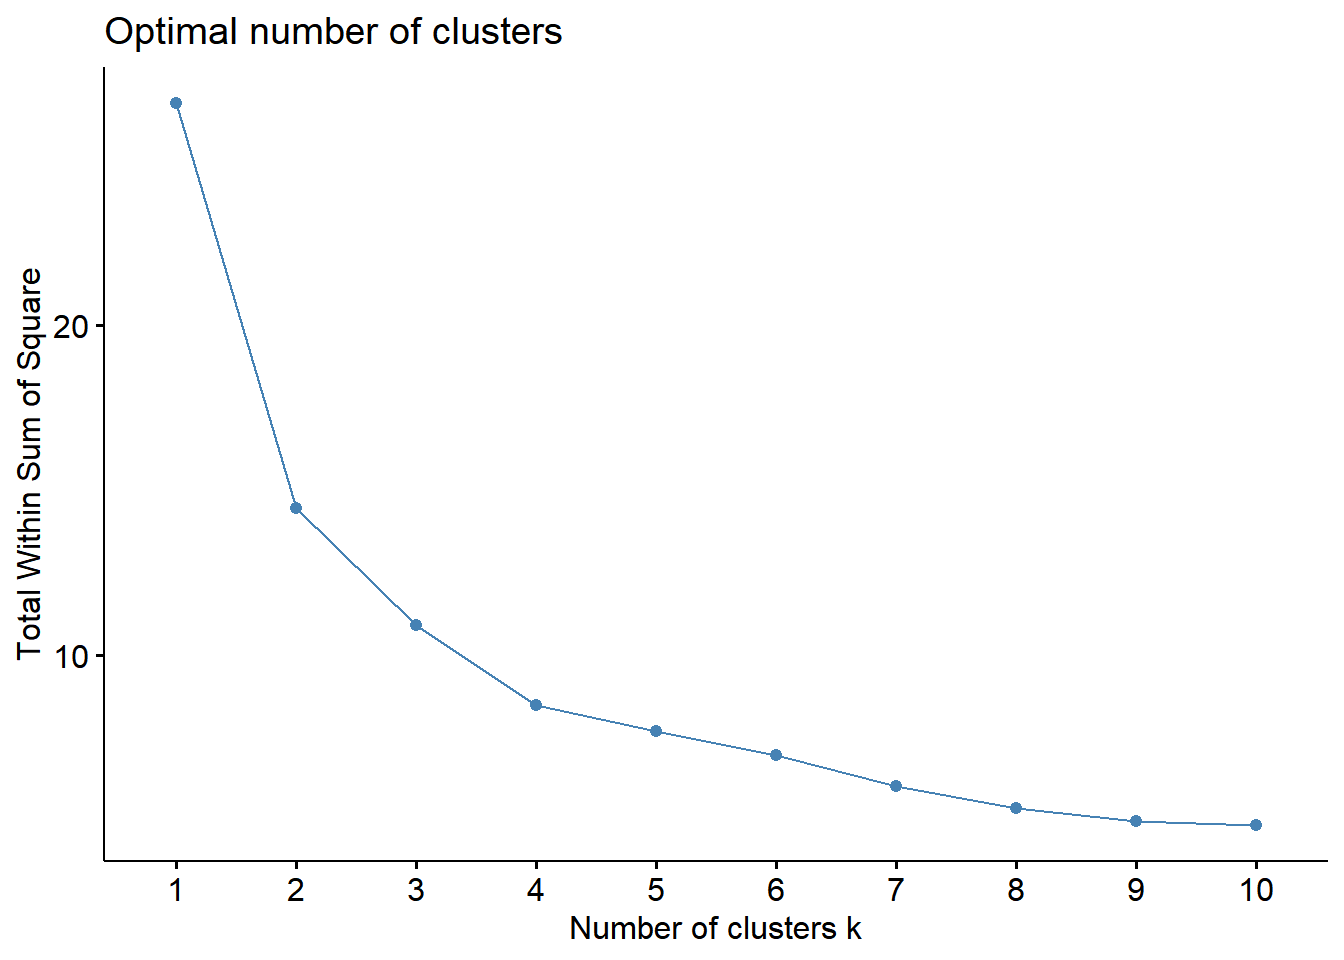

``` r
# k=2 or k=4

fviz_nbclust(scaled_final, kmeans, method = "silhouette")
```

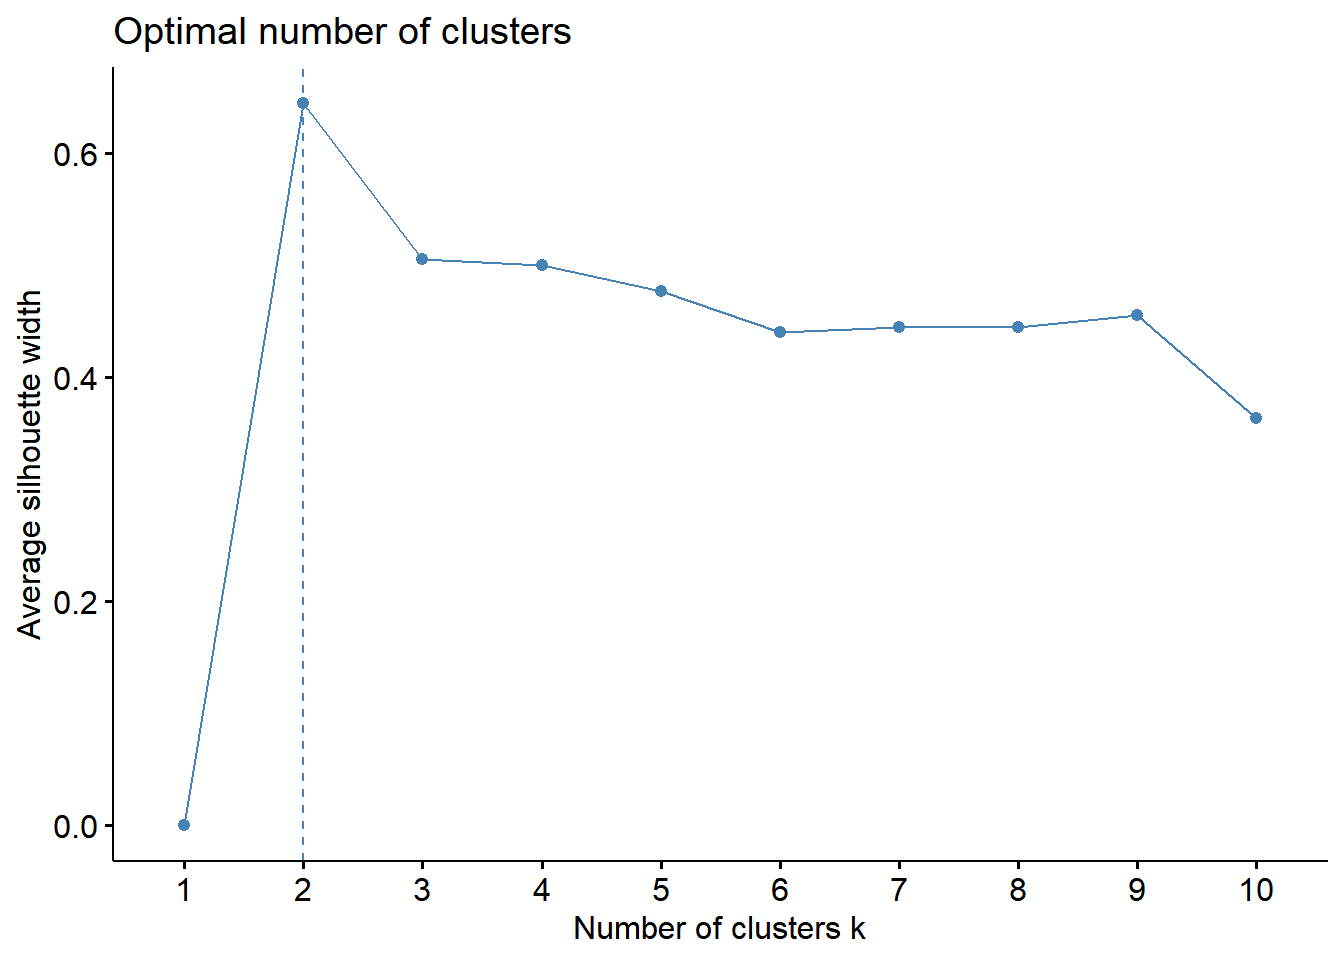

``` r
# k=2

#팔꿈치 및 평균 실루엣 방법의 단점은 글로벌 클러스터링 특성만 측정한다는 것입니다. 보다 정교한 방법은 
#최적의 클러스터 수를 추정하기 위해 엘보우/실루엣 휴리스틱을 공식화하는 통계 절차를 제공하는 갭 통계를 사용하는 것입니다.
fviz_nbclust(scaled_final, kmeans, nstart = 50,  method = "gap_stat", nboot=500)
```

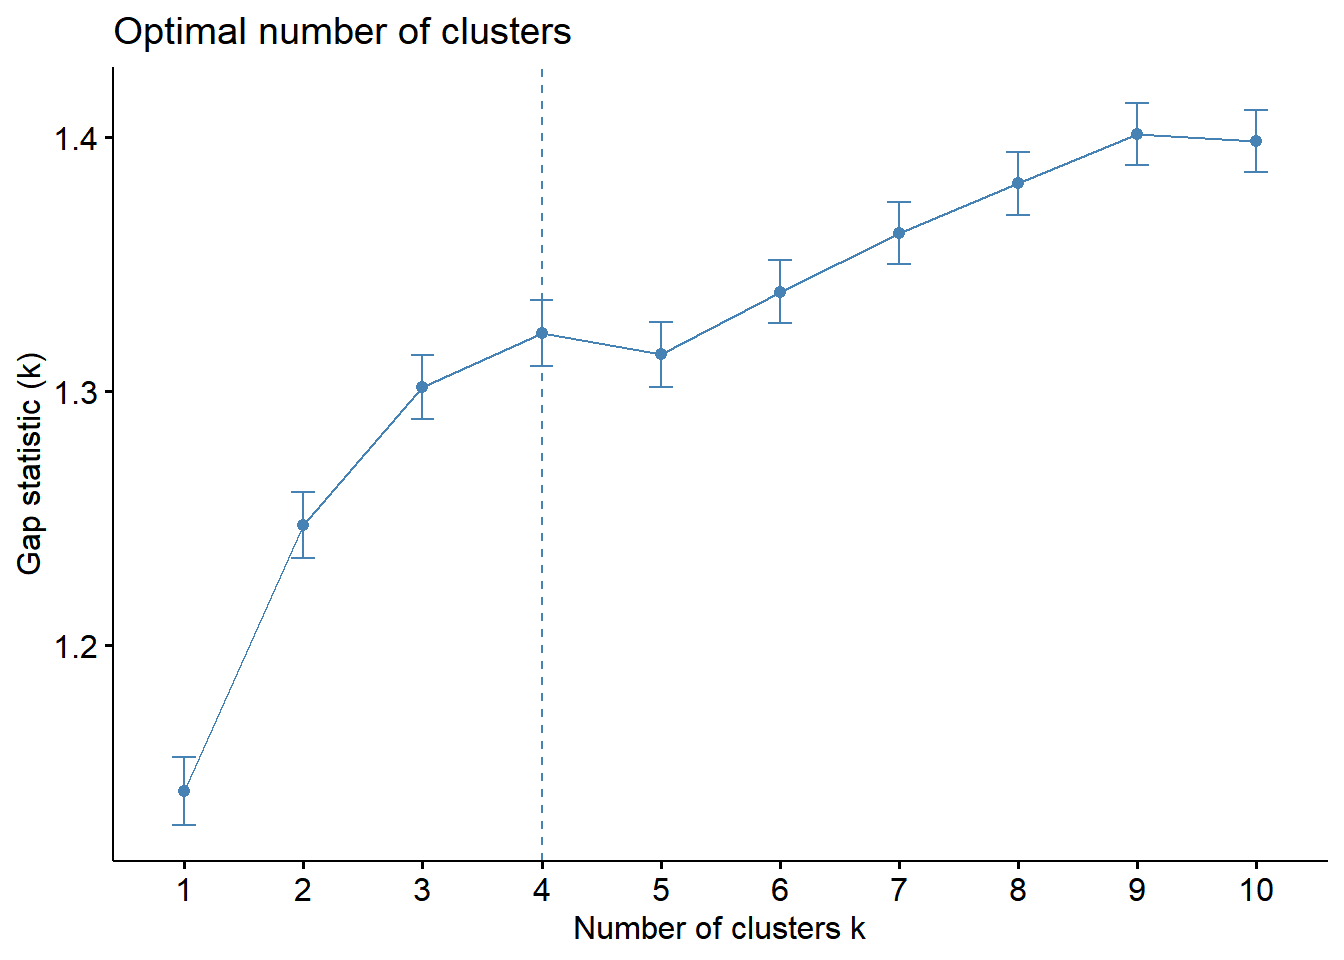

``` r
# k=4
## gap이 줄어들다 어느 시점에 올라감. 줄어드는 그 직전의 시점이 최적
nc=NbClust(scaled_final,min.nc=2,max.nc=10, method="kmeans")
```

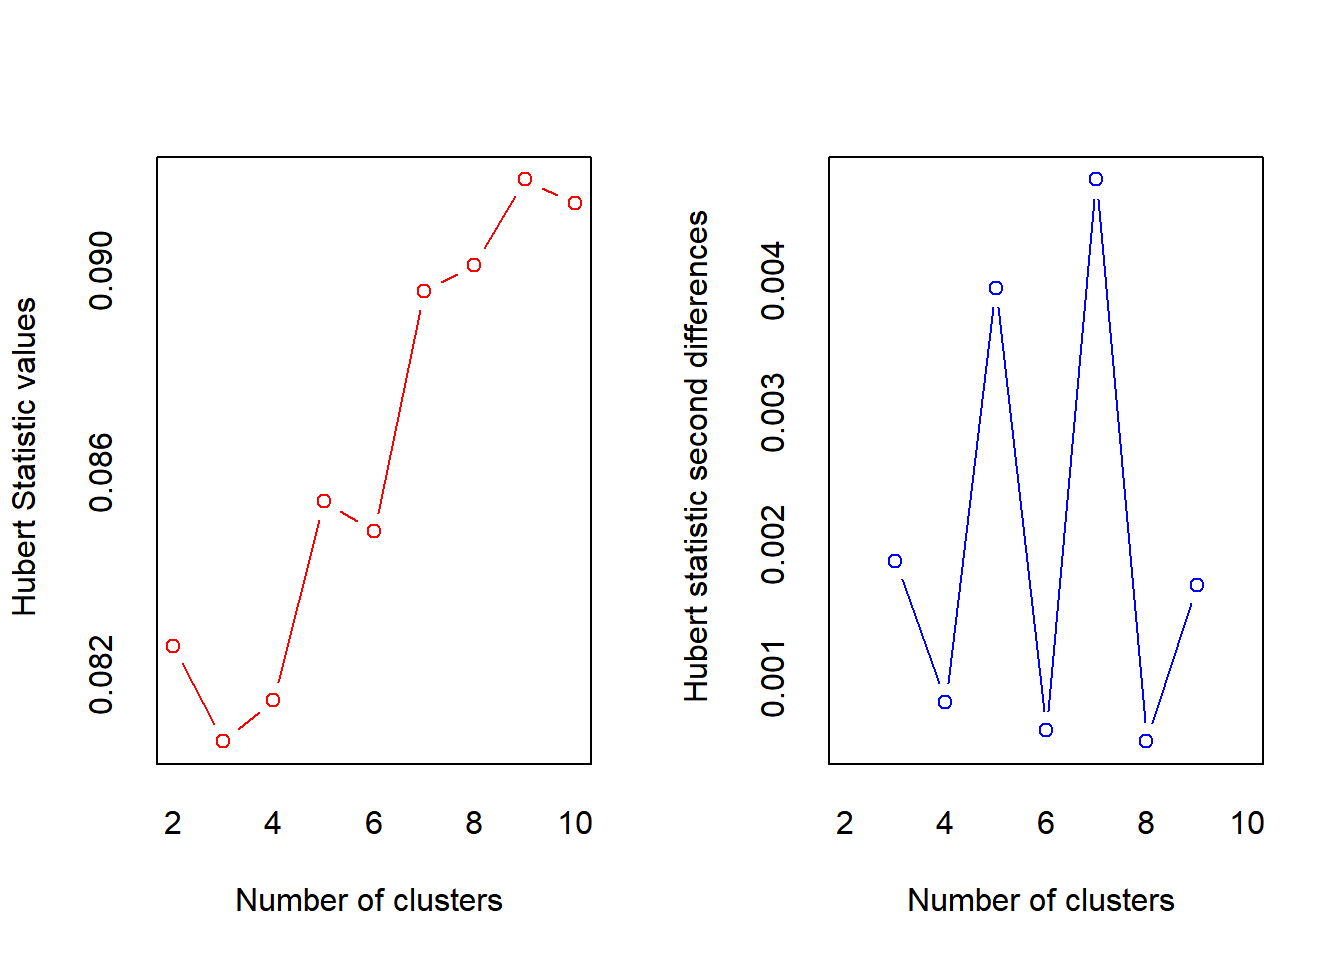

``` hljs
## *** : The Hubert index is a graphical method of determining the number of clusters.
##                 In the plot of Hubert index, we seek a significant knee that corresponds to a 
##                 significant increase of the value of the measure i.e the significant peak in Hubert
##                 index second differences plot. 
## 
```

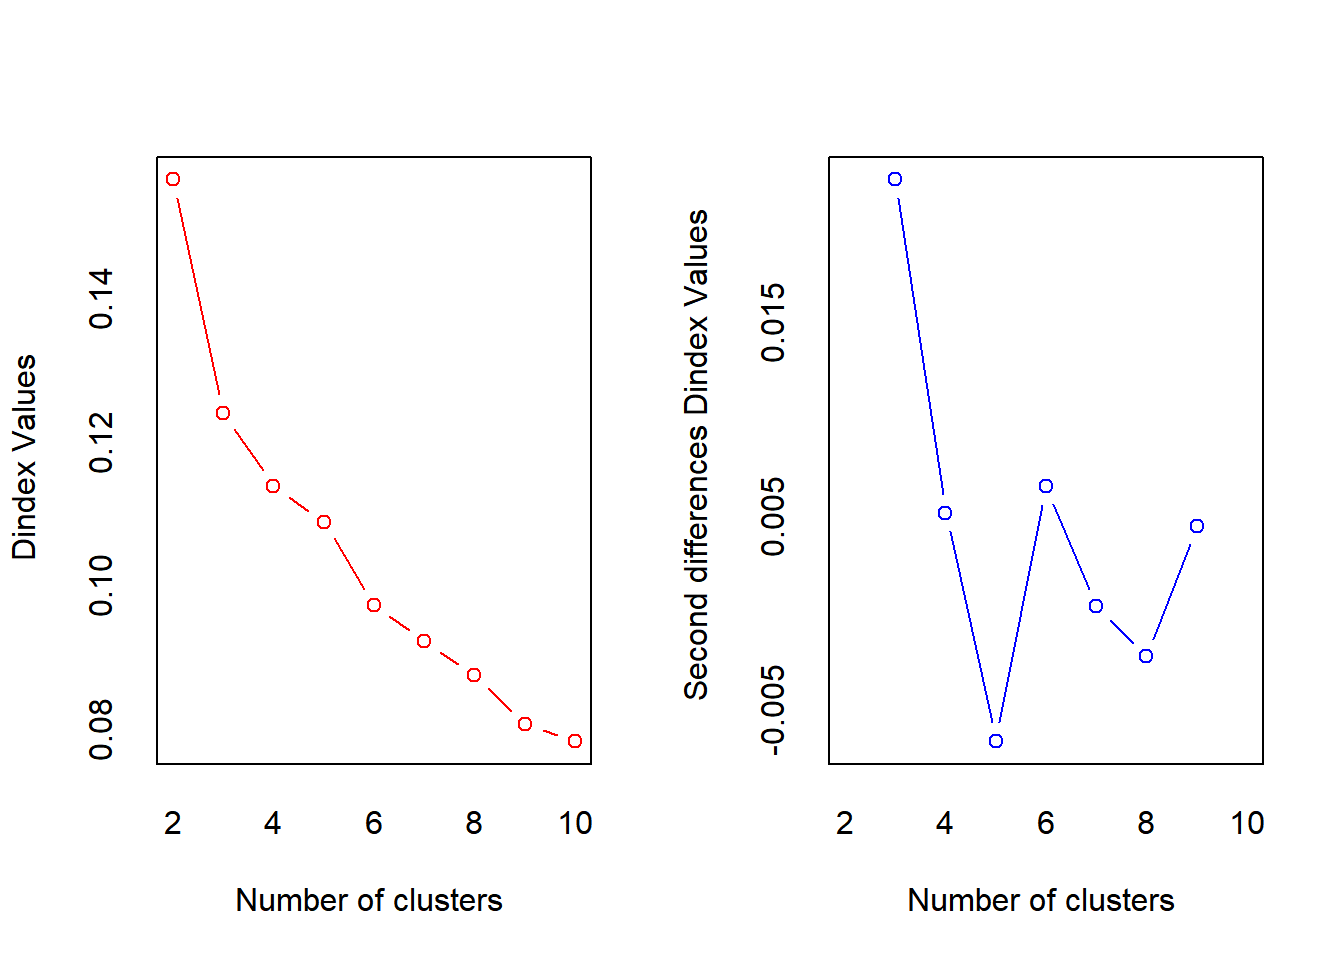

``` hljs
## *** : The D index is a graphical method of determining the number of clusters. 
##                 In the plot of D index, we seek a significant knee (the significant peak in Dindex
##                 second differences plot) that corresponds to a significant increase of the value of
##                 the measure. 
##  
## ******************************************************************* 
## * Among all indices:                                                
## * 10 proposed 2 as the best number of clusters 
## * 3 proposed 3 as the best number of clusters 
## * 3 proposed 4 as the best number of clusters 
## * 2 proposed 7 as the best number of clusters 
## * 1 proposed 9 as the best number of clusters 
## * 5 proposed 10 as the best number of clusters 
## 
##                    ***** Conclusion *****                            
##  
## * According to the majority rule, the best number of clusters is  2 
##  
##  
## *******************************************************************
```

``` r
# k=2


#gap_stat2 <- clusGap(scaled_final, FUN=kmeans, K.max=20, B=50)
#fviz_gap_stat(gap_stat2)

#install.packages("clvalid")
library(clValid)
#install.packages("clvalid", dependencies=TRUE, repos='http://cran.rstudio.com/')

# 위의 결과 토대로 k=2부터 k=4까지
#k_means_clvalid <- clValid(scaled_final,2:4, clMethods="kmeans",validation="internal", maxitems = nrow(scaled_final))
#summary(k_means_clvalid)
# dunn값이 가장 큰 k=8, 연결성, 실루엣 값 높은 k=2로 선택지 좁힘
```

``` r
str(scaled_final)
```

``` hljs
## 'data.frame':    363 obs. of  4 variables:
##  $ 인구수                       : num  0.009521 0.005538 0.000778 0.013052 0.007652 ...
##  $ 택배함.개수                  : num  0 0 0.1 0 0 0 0 0 0 0 ...
##  $ 공공자전거.거치대수.LCD...QR.: num  0.00633 0 0 0 0 ...
##  $ 충전소.개수.전기.수소.       : num  0 0 0 0 0 ...
```

``` r
## 최종결과 도출
# 위의 결과에 따라 k =2 일때와 k=4 비교
set.seed(123)
km2 <- kmeans(scaled_final, centers =2)
km2
```

``` hljs
## K-means clustering with 2 clusters of sizes 48, 315
## 
## Cluster means:
##       인구수 택배함.개수 공공자전거.거치대수.LCD...QR. 충전소.개수.전기.수소.
## 1 0.38628106  0.30208333                     0.2312451             0.34738372
## 2 0.06266295  0.03777778                     0.0446405             0.05714286
## 
## Clustering vector:
##        종로구 청운동        종로구 신교동        종로구 궁정동 
##                    2                    2                    2 
##        종로구 누상동        종로구 옥인동        종로구 필운동 
##                    2                    2                    2 
##        종로구 사직동        종로구 내수동        종로구 수송동 
##                    2                    2                    2 
##        종로구 와룡동        종로구 익선동        종로구 관철동 
##                    2                    2                    2 
##        종로구 낙원동        종로구 삼청동        종로구 소격동 
##                    2                    2                    2 
##        종로구 가회동          종로구 계동        종로구 원서동 
##                    2                    2                    2 
##       종로구 종로3가        종로구 인의동        종로구 연지동 
##                    2                    2                    2 
##        종로구 효제동        종로구 이화동        종로구 연건동 
##                    2                    2                    2 
##        종로구 충신동        종로구 동숭동        종로구 혜화동 
##                    2                    2                    2 
##       종로구 명륜1가       종로구 명륜2가       종로구 명륜3가 
##                    2                    2                    2 
##        종로구 창신동        종로구 숭인동          종로구 평동 
##                    2                    2                    2 
##        종로구 송월동        종로구 홍파동        종로구 교북동 
##                    2                    2                    2 
##        종로구 행촌동        종로구 구기동        종로구 평창동 
##                    2                    2                    2 
##        종로구 부암동        종로구 홍지동        종로구 신영동 
##                    2                    2                    2 
##        종로구 무악동            중구 다동       중구 태평로1가 
##                    2                    2                    2 
##          중구 소공동       중구 태평로2가     중구 남대문로5가 
##                    2                    2                    2 
##       중구 회현동1가       중구 회현동2가         중구 명동1가 
##                    2                    2                    2 
##       중구 남산동2가       중구 남산동3가       중구 충무로4가 
##                    2                    2                    2 
##       중구 인현동2가          중구 묵정동         중구 필동2가 
##                    2                    2                    2 
##         중구 필동3가          중구 예장동       중구 장충동1가 
##                    2                    2                    2 
##       중구 장충동2가       중구 광희동2가       중구 을지로6가 
##                    2                    2                    2 
##       중구 을지로7가       중구 을지로4가          중구 신당동 
##                    2                    2                    1 
##          중구 흥인동          중구 황학동          중구 순화동 
##                    2                    2                    2 
##          중구 중림동       중구 만리동1가       중구 만리동2가 
##                    2                    2                    2 
##        용산구 후암동     용산구 용산동2가        용산구 갈월동 
##                    2                    2                    2 
##        용산구 남영동        용산구 동자동        용산구 서계동 
##                    2                    2                    2 
##     용산구 청파동1가     용산구 청파동2가     용산구 청파동3가 
##                    2                    2                    2 
##     용산구 원효로1가     용산구 원효로2가        용산구 신창동 
##                    2                    2                    2 
##        용산구 산천동        용산구 청암동     용산구 원효로3가 
##                    2                    2                    2 
##     용산구 원효로4가        용산구 효창동        용산구 도원동 
##                    2                    2                    2 
##        용산구 용문동        용산구 문배동        용산구 신계동 
##                    2                    2                    2 
##     용산구 한강로1가     용산구 한강로2가     용산구 용산동5가 
##                    2                    2                    2 
##     용산구 한강로3가        용산구 이촌동      용산구 이태원동 
##                    2                    2                    2 
##        용산구 한남동      용산구 동빙고동      용산구 서빙고동 
##                    2                    2                    2 
##        용산구 보광동    성동구 상왕십리동    성동구 하왕십리동 
##                    2                    2                    2 
##        성동구 홍익동        성동구 도선동        성동구 마장동 
##                    2                    2                    2 
##        성동구 사근동        성동구 행당동        성동구 응봉동 
##                    2                    2                    2 
##     성동구 금호동1가     성동구 금호동2가     성동구 금호동3가 
##                    2                    2                    2 
##     성동구 금호동4가        성동구 옥수동     성동구 성수동1가 
##                    2                    2                    1 
##     성동구 성수동2가        성동구 송정동        성동구 용답동 
##                    2                    2                    2 
##        광진구 중곡동          광진구 능동        광진구 구의동 
##                    1                    2                    1 
##        광진구 광장동        광진구 자양동        광진구 화양동 
##                    2                    1                    2 
##        광진구 군자동      동대문구 신설동      동대문구 용두동 
##                    2                    2                    2 
##      동대문구 제기동      동대문구 전농동    동대문구 답십리동 
##                    2                    2                    2 
##      동대문구 장안동    동대문구 청량리동      동대문구 회기동 
##                    2                    2                    2 
##      동대문구 휘경동      동대문구 이문동        중랑구 면목동 
##                    2                    2                    1 
##        중랑구 상봉동        중랑구 중화동          중랑구 묵동 
##                    2                    2                    2 
##        중랑구 망우동        중랑구 신내동        성북구 성북동 
##                    2                    2                    2 
##     성북구 성북동1가        성북구 돈암동   성북구 동소문동1가 
##                    2                    2                    2 
##   성북구 동소문동4가   성북구 동소문동5가   성북구 동소문동6가 
##                    2                    2                    2 
##   성북구 동소문동7가     성북구 삼선동1가     성북구 삼선동2가 
##                    2                    2                    2 
##     성북구 삼선동3가     성북구 삼선동4가     성북구 삼선동5가 
##                    2                    2                    2 
##     성북구 동선동1가     성북구 동선동2가     성북구 동선동3가 
##                    2                    2                    2 
##     성북구 동선동4가     성북구 동선동5가     성북구 안암동1가 
##                    2                    2                    2 
##     성북구 안암동2가     성북구 안암동3가     성북구 안암동4가 
##                    2                    2                    2 
##     성북구 안암동5가     성북구 보문동4가     성북구 보문동5가 
##                    2                    2                    2 
##     성북구 보문동6가     성북구 보문동7가     성북구 보문동1가 
##                    2                    2                    2 
##     성북구 보문동2가     성북구 보문동3가        성북구 정릉동 
##                    2                    2                    1 
##        성북구 길음동        성북구 종암동      성북구 하월곡동 
##                    2                    2                    2 
##      성북구 상월곡동        성북구 장위동        성북구 석관동 
##                    2                    2                    2 
##        강북구 미아동          강북구 번동        강북구 수유동 
##                    1                    2                    1 
##        강북구 우이동        도봉구 쌍문동        도봉구 방학동 
##                    2                    2                    1 
##          도봉구 창동        도봉구 도봉동        노원구 월계동 
##                    1                    2                    1 
##        노원구 공릉동        노원구 하계동        노원구 상계동 
##                    1                    2                    1 
##        노원구 중계동        은평구 수색동        은평구 녹번동 
##                    1                    2                    2 
##        은평구 불광동        은평구 갈현동        은평구 구산동 
##                    2                    2                    2 
##        은평구 대조동        은평구 응암동        은평구 역촌동 
##                    2                    2                    2 
##        은평구 신사동        은평구 증산동        은평구 진관동 
##                    2                    2                    2 
##   서대문구 충정로2가   서대문구 충정로3가        서대문구 합동 
##                    2                    2                    2 
##      서대문구 냉천동      서대문구 천연동      서대문구 옥천동 
##                    2                    2                    2 
##      서대문구 영천동      서대문구 현저동    서대문구 북아현동 
##                    2                    2                    2 
##      서대문구 홍제동      서대문구 대현동      서대문구 대신동 
##                    2                    2                    2 
##      서대문구 신촌동      서대문구 창천동      서대문구 연희동 
##                    2                    2                    2 
##      서대문구 홍은동    서대문구 북가좌동    서대문구 남가좌동 
##                    2                    2                    1 
##        마포구 아현동        마포구 공덕동      마포구 신공덕동 
##                    2                    2                    2 
##        마포구 도화동        마포구 용강동        마포구 토정동 
##                    2                    2                    2 
##        마포구 마포동        마포구 대흥동        마포구 염리동 
##                    2                    2                    2 
##      마포구 노고산동        마포구 신수동        마포구 현석동 
##                    2                    2                    2 
##        마포구 창전동        마포구 상수동        마포구 하중동 
##                    2                    2                    2 
##        마포구 신정동        마포구 당인동        마포구 서교동 
##                    2                    2                    2 
##        마포구 동교동        마포구 합정동        마포구 망원동 
##                    2                    2                    2 
##        마포구 연남동        마포구 성산동          마포구 중동 
##                    2                    1                    2 
##        마포구 상암동        양천구 신정동          양천구 목동 
##                    2                    1                    1 
##        양천구 신월동        강서구 염창동        강서구 등촌동 
##                    1                    2                    2 
##        강서구 화곡동        강서구 가양동        강서구 마곡동 
##                    1                    2                    1 
##      강서구 내발산동      강서구 외발산동        강서구 공항동 
##                    2                    2                    2 
##        강서구 방화동        강서구 개화동        강서구 오곡동 
##                    1                    2                    2 
##      구로구 신도림동        구로구 구로동      구로구 가리봉동 
##                    2                    1                    2 
##        구로구 고척동        구로구 개봉동        구로구 오류동 
##                    1                    2                    2 
##          구로구 궁동        구로구 온수동        구로구 천왕동 
##                    2                    2                    2 
##          구로구 항동        금천구 가산동        금천구 독산동 
##                    2                    2                    1 
##        금천구 시흥동    영등포구 영등포동 영등포구 영등포동1가 
##                    1                    2                    2 
## 영등포구 영등포동2가 영등포구 영등포동3가 영등포구 영등포동4가 
##                    2                    2                    2 
## 영등포구 영등포동5가 영등포구 영등포동6가 영등포구 영등포동7가 
##                    2                    2                    2 
## 영등포구 영등포동8가    영등포구 여의도동   영등포구 당산동1가 
##                    2                    1                    2 
##   영등포구 당산동2가   영등포구 당산동3가   영등포구 당산동4가 
##                    2                    2                    2 
##   영등포구 당산동5가   영등포구 당산동6가      영등포구 당산동 
##                    2                    2                    2 
##      영등포구 도림동   영등포구 문래동2가   영등포구 문래동3가 
##                    2                    2                    2 
##   영등포구 문래동4가   영등포구 문래동5가   영등포구 문래동6가 
##                    2                    2                    2 
##   영등포구 양평동1가   영등포구 양평동2가   영등포구 양평동3가 
##                    2                    2                    2 
##   영등포구 양평동4가   영등포구 양평동5가   영등포구 양평동6가 
##                    2                    2                    2 
##      영등포구 신길동      영등포구 대림동      동작구 노량진동 
##                    1                    2                    2 
##        동작구 상도동       동작구 상도1동          동작구 본동 
##                    1                    2                    2 
##        동작구 흑석동        동작구 동작동        동작구 사당동 
##                    2                    2                    1 
##        동작구 대방동      동작구 신대방동        관악구 봉천동 
##                    2                    2                    1 
##        관악구 신림동        관악구 남현동        서초구 방배동 
##                    1                    2                    1 
##        서초구 양재동        서초구 우면동        서초구 원지동 
##                    2                    1                    2 
##        서초구 잠원동        서초구 반포동        서초구 서초동 
##                    2                    1                    1 
##        서초구 내곡동        서초구 염곡동        서초구 신원동 
##                    2                    2                    2 
##        강남구 역삼동        강남구 개포동        강남구 청담동 
##                    1                    2                    2 
##        강남구 삼성동        강남구 대치동        강남구 신사동 
##                    1                    1                    2 
##        강남구 논현동      강남구 압구정동        강남구 세곡동 
##                    2                    2                    2 
##        강남구 자곡동        강남구 율현동        강남구 일원동 
##                    2                    2                    2 
##        강남구 수서동        강남구 도곡동        송파구 잠실동 
##                    2                    1                    1 
##        송파구 신천동        송파구 풍납동        송파구 송파동 
##                    2                    2                    2 
##        송파구 석촌동        송파구 삼전동        송파구 가락동 
##                    2                    2                    1 
##        송파구 문정동        송파구 장지동        송파구 방이동 
##                    2                    1                    2 
##        송파구 오금동        송파구 거여동        송파구 마천동 
##                    2                    1                    2 
##        강동구 명일동        강동구 고덕동        강동구 상일동 
##                    2                    2                    2 
##          강동구 길동        강동구 둔촌동        강동구 암사동 
##                    2                    2                    1 
##        강동구 성내동        강동구 천호동        강동구 강일동 
##                    1                    1                    2 
## 
## Within cluster sum of squares by cluster:
## [1] 7.920463 6.548936
##  (between_SS / total_SS =  45.8 %)
## 
## Available components:
## 
## [1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
## [6] "betweenss"    "size"         "iter"         "ifault"
```

``` r
set.seed(1234)
km <- kmeans(scaled_final, centers =4)
km
```

``` hljs
## K-means clustering with 4 clusters of sizes 18, 24, 236, 85
## 
## Cluster means:
##       인구수 택배함.개수 공공자전거.거치대수.LCD...QR. 충전소.개수.전기.수소.
## 1 0.56418274  0.52222222                    0.26291018             0.25581395
## 2 0.24969254  0.11666667                    0.17992874             0.50290698
## 3 0.02734406  0.02415254                    0.02225667             0.02424123
## 4 0.18446132  0.10000000                    0.12774440             0.14445964
## 
## Clustering vector:
##        종로구 청운동        종로구 신교동        종로구 궁정동 
##                    3                    3                    3 
##        종로구 누상동        종로구 옥인동        종로구 필운동 
##                    3                    3                    3 
##        종로구 사직동        종로구 내수동        종로구 수송동 
##                    3                    3                    3 
##        종로구 와룡동        종로구 익선동        종로구 관철동 
##                    3                    3                    3 
##        종로구 낙원동        종로구 삼청동        종로구 소격동 
##                    3                    3                    3 
##        종로구 가회동          종로구 계동        종로구 원서동 
##                    3                    3                    3 
##       종로구 종로3가        종로구 인의동        종로구 연지동 
##                    3                    3                    3 
##        종로구 효제동        종로구 이화동        종로구 연건동 
##                    3                    3                    3 
##        종로구 충신동        종로구 동숭동        종로구 혜화동 
##                    3                    3                    3 
##       종로구 명륜1가       종로구 명륜2가       종로구 명륜3가 
##                    3                    3                    3 
##        종로구 창신동        종로구 숭인동          종로구 평동 
##                    4                    3                    3 
##        종로구 송월동        종로구 홍파동        종로구 교북동 
##                    3                    3                    3 
##        종로구 행촌동        종로구 구기동        종로구 평창동 
##                    3                    3                    3 
##        종로구 부암동        종로구 홍지동        종로구 신영동 
##                    3                    3                    3 
##        종로구 무악동            중구 다동       중구 태평로1가 
##                    3                    3                    3 
##          중구 소공동       중구 태평로2가     중구 남대문로5가 
##                    3                    3                    3 
##       중구 회현동1가       중구 회현동2가         중구 명동1가 
##                    3                    3                    3 
##       중구 남산동2가       중구 남산동3가       중구 충무로4가 
##                    3                    3                    3 
##       중구 인현동2가          중구 묵정동         중구 필동2가 
##                    3                    3                    3 
##         중구 필동3가          중구 예장동       중구 장충동1가 
##                    3                    3                    3 
##       중구 장충동2가       중구 광희동2가       중구 을지로6가 
##                    3                    3                    3 
##       중구 을지로7가       중구 을지로4가          중구 신당동 
##                    3                    3                    4 
##          중구 흥인동          중구 황학동          중구 순화동 
##                    3                    3                    3 
##          중구 중림동       중구 만리동1가       중구 만리동2가 
##                    3                    3                    3 
##        용산구 후암동     용산구 용산동2가        용산구 갈월동 
##                    3                    4                    3 
##        용산구 남영동        용산구 동자동        용산구 서계동 
##                    3                    3                    3 
##     용산구 청파동1가     용산구 청파동2가     용산구 청파동3가 
##                    3                    3                    3 
##     용산구 원효로1가     용산구 원효로2가        용산구 신창동 
##                    3                    3                    3 
##        용산구 산천동        용산구 청암동     용산구 원효로3가 
##                    3                    3                    3 
##     용산구 원효로4가        용산구 효창동        용산구 도원동 
##                    3                    3                    3 
##        용산구 용문동        용산구 문배동        용산구 신계동 
##                    3                    3                    3 
##     용산구 한강로1가     용산구 한강로2가     용산구 용산동5가 
##                    3                    3                    3 
##     용산구 한강로3가        용산구 이촌동      용산구 이태원동 
##                    3                    4                    3 
##        용산구 한남동      용산구 동빙고동      용산구 서빙고동 
##                    3                    3                    3 
##        용산구 보광동    성동구 상왕십리동    성동구 하왕십리동 
##                    3                    3                    4 
##        성동구 홍익동        성동구 도선동        성동구 마장동 
##                    3                    3                    4 
##        성동구 사근동        성동구 행당동        성동구 응봉동 
##                    3                    4                    3 
##     성동구 금호동1가     성동구 금호동2가     성동구 금호동3가 
##                    3                    3                    3 
##     성동구 금호동4가        성동구 옥수동     성동구 성수동1가 
##                    3                    3                    2 
##     성동구 성수동2가        성동구 송정동        성동구 용답동 
##                    4                    3                    3 
##        광진구 중곡동          광진구 능동        광진구 구의동 
##                    4                    3                    2 
##        광진구 광장동        광진구 자양동        광진구 화양동 
##                    4                    1                    3 
##        광진구 군자동      동대문구 신설동      동대문구 용두동 
##                    3                    3                    4 
##      동대문구 제기동      동대문구 전농동    동대문구 답십리동 
##                    3                    4                    4 
##      동대문구 장안동    동대문구 청량리동      동대문구 회기동 
##                    4                    3                    3 
##      동대문구 휘경동      동대문구 이문동        중랑구 면목동 
##                    4                    4                    1 
##        중랑구 상봉동        중랑구 중화동          중랑구 묵동 
##                    4                    4                    4 
##        중랑구 망우동        중랑구 신내동        성북구 성북동 
##                    4                    4                    3 
##     성북구 성북동1가        성북구 돈암동   성북구 동소문동1가 
##                    3                    4                    3 
##   성북구 동소문동4가   성북구 동소문동5가   성북구 동소문동6가 
##                    3                    3                    3 
##   성북구 동소문동7가     성북구 삼선동1가     성북구 삼선동2가 
##                    3                    3                    3 
##     성북구 삼선동3가     성북구 삼선동4가     성북구 삼선동5가 
##                    3                    3                    3 
##     성북구 동선동1가     성북구 동선동2가     성북구 동선동3가 
##                    3                    3                    3 
##     성북구 동선동4가     성북구 동선동5가     성북구 안암동1가 
##                    3                    3                    3 
##     성북구 안암동2가     성북구 안암동3가     성북구 안암동4가 
##                    3                    3                    3 
##     성북구 안암동5가     성북구 보문동4가     성북구 보문동5가 
##                    3                    3                    3 
##     성북구 보문동6가     성북구 보문동7가     성북구 보문동1가 
##                    3                    3                    3 
##     성북구 보문동2가     성북구 보문동3가        성북구 정릉동 
##                    3                    3                    4 
##        성북구 길음동        성북구 종암동      성북구 하월곡동 
##                    4                    3                    4 
##      성북구 상월곡동        성북구 장위동        성북구 석관동 
##                    3                    4                    4 
##        강북구 미아동          강북구 번동        강북구 수유동 
##                    2                    4                    1 
##        강북구 우이동        도봉구 쌍문동        도봉구 방학동 
##                    3                    4                    2 
##          도봉구 창동        도봉구 도봉동        노원구 월계동 
##                    1                    4                    4 
##        노원구 공릉동        노원구 하계동        노원구 상계동 
##                    2                    4                    1 
##        노원구 중계동        은평구 수색동        은평구 녹번동 
##                    2                    3                    4 
##        은평구 불광동        은평구 갈현동        은평구 구산동 
##                    4                    4                    3 
##        은평구 대조동        은평구 응암동        은평구 역촌동 
##                    3                    4                    4 
##        은평구 신사동        은평구 증산동        은평구 진관동 
##                    4                    3                    4 
##   서대문구 충정로2가   서대문구 충정로3가        서대문구 합동 
##                    3                    3                    3 
##      서대문구 냉천동      서대문구 천연동      서대문구 옥천동 
##                    3                    3                    3 
##      서대문구 영천동      서대문구 현저동    서대문구 북아현동 
##                    3                    3                    3 
##      서대문구 홍제동      서대문구 대현동      서대문구 대신동 
##                    4                    3                    3 
##      서대문구 신촌동      서대문구 창천동      서대문구 연희동 
##                    3                    3                    4 
##      서대문구 홍은동    서대문구 북가좌동    서대문구 남가좌동 
##                    4                    4                    4 
##        마포구 아현동        마포구 공덕동      마포구 신공덕동 
##                    2                    3                    3 
##        마포구 도화동        마포구 용강동        마포구 토정동 
##                    3                    3                    3 
##        마포구 마포동        마포구 대흥동        마포구 염리동 
##                    3                    3                    4 
##      마포구 노고산동        마포구 신수동        마포구 현석동 
##                    3                    3                    3 
##        마포구 창전동        마포구 상수동        마포구 하중동 
##                    3                    3                    3 
##        마포구 신정동        마포구 당인동        마포구 서교동 
##                    2                    3                    4 
##        마포구 동교동        마포구 합정동        마포구 망원동 
##                    3                    4                    3 
##        마포구 연남동        마포구 성산동          마포구 중동 
##                    3                    4                    3 
##        마포구 상암동        양천구 신정동          양천구 목동 
##                    4                    1                    1 
##        양천구 신월동        강서구 염창동        강서구 등촌동 
##                    1                    3                    4 
##        강서구 화곡동        강서구 가양동        강서구 마곡동 
##                    1                    4                    4 
##      강서구 내발산동      강서구 외발산동        강서구 공항동 
##                    4                    3                    3 
##        강서구 방화동        강서구 개화동        강서구 오곡동 
##                    4                    3                    3 
##      구로구 신도림동        구로구 구로동      구로구 가리봉동 
##                    4                    1                    3 
##        구로구 고척동        구로구 개봉동        구로구 오류동 
##                    2                    4                    4 
##          구로구 궁동        구로구 온수동        구로구 천왕동 
##                    3                    3                    4 
##          구로구 항동        금천구 가산동        금천구 독산동 
##                    4                    4                    1 
##        금천구 시흥동    영등포구 영등포동 영등포구 영등포동1가 
##                    1                    3                    3 
## 영등포구 영등포동2가 영등포구 영등포동3가 영등포구 영등포동4가 
##                    3                    3                    3 
## 영등포구 영등포동5가 영등포구 영등포동6가 영등포구 영등포동7가 
##                    3                    3                    3 
## 영등포구 영등포동8가    영등포구 여의도동   영등포구 당산동1가 
##                    3                    2                    3 
##   영등포구 당산동2가   영등포구 당산동3가   영등포구 당산동4가 
##                    3                    3                    3 
##   영등포구 당산동5가   영등포구 당산동6가      영등포구 당산동 
##                    3                    3                    3 
##      영등포구 도림동   영등포구 문래동2가   영등포구 문래동3가 
##                    3                    3                    2 
##   영등포구 문래동4가   영등포구 문래동5가   영등포구 문래동6가 
##                    3                    3                    3 
##   영등포구 양평동1가   영등포구 양평동2가   영등포구 양평동3가 
##                    3                    3                    3 
##   영등포구 양평동4가   영등포구 양평동5가   영등포구 양평동6가 
##                    3                    3                    3 
##      영등포구 신길동      영등포구 대림동      동작구 노량진동 
##                    1                    4                    3 
##        동작구 상도동       동작구 상도1동          동작구 본동 
##                    1                    3                    3 
##        동작구 흑석동        동작구 동작동        동작구 사당동 
##                    4                    3                    1 
##        동작구 대방동      동작구 신대방동        관악구 봉천동 
##                    2                    4                    1 
##        관악구 신림동        관악구 남현동        서초구 방배동 
##                    1                    3                    2 
##        서초구 양재동        서초구 우면동        서초구 원지동 
##                    4                    2                    3 
##        서초구 잠원동        서초구 반포동        서초구 서초동 
##                    4                    2                    2 
##        서초구 내곡동        서초구 염곡동        서초구 신원동 
##                    3                    3                    3 
##        강남구 역삼동        강남구 개포동        강남구 청담동 
##                    2                    4                    3 
##        강남구 삼성동        강남구 대치동        강남구 신사동 
##                    2                    4                    3 
##        강남구 논현동      강남구 압구정동        강남구 세곡동 
##                    4                    3                    3 
##        강남구 자곡동        강남구 율현동        강남구 일원동 
##                    4                    3                    4 
##        강남구 수서동        강남구 도곡동        송파구 잠실동 
##                    3                    2                    2 
##        송파구 신천동        송파구 풍납동        송파구 송파동 
##                    4                    4                    4 
##        송파구 석촌동        송파구 삼전동        송파구 가락동 
##                    3                    4                    2 
##        송파구 문정동        송파구 장지동        송파구 방이동 
##                    4                    2                    4 
##        송파구 오금동        송파구 거여동        송파구 마천동 
##                    4                    2                    4 
##        강동구 명일동        강동구 고덕동        강동구 상일동 
##                    4                    4                    4 
##          강동구 길동        강동구 둔촌동        강동구 암사동 
##                    4                    4                    4 
##        강동구 성내동        강동구 천호동        강동구 강일동 
##                    2                    1                    4 
## 
## Within cluster sum of squares by cluster:
## [1] 2.341060 1.675096 1.464450 3.029937
##  (between_SS / total_SS =  68.1 %)
## 
## Available components:
## 
## [1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
## [6] "betweenss"    "size"         "iter"         "ifault"
```

``` r
# between_SS / total_SS 값이 높을수록 잘 분류된 군집, 클러스터 간의 거리를 나타내므로 값이 클수록 클러스터간 구별이 잘 된다는 것
#centers=2일 때,45.8 4일 때 68.1% -> k means에서 k는 4로 설정
```

``` r
library(factoextra)
# 클러스터링 시각화
set.seed(1234)
fviz_cluster(km, data = scaled_final)+theme_bw()
```

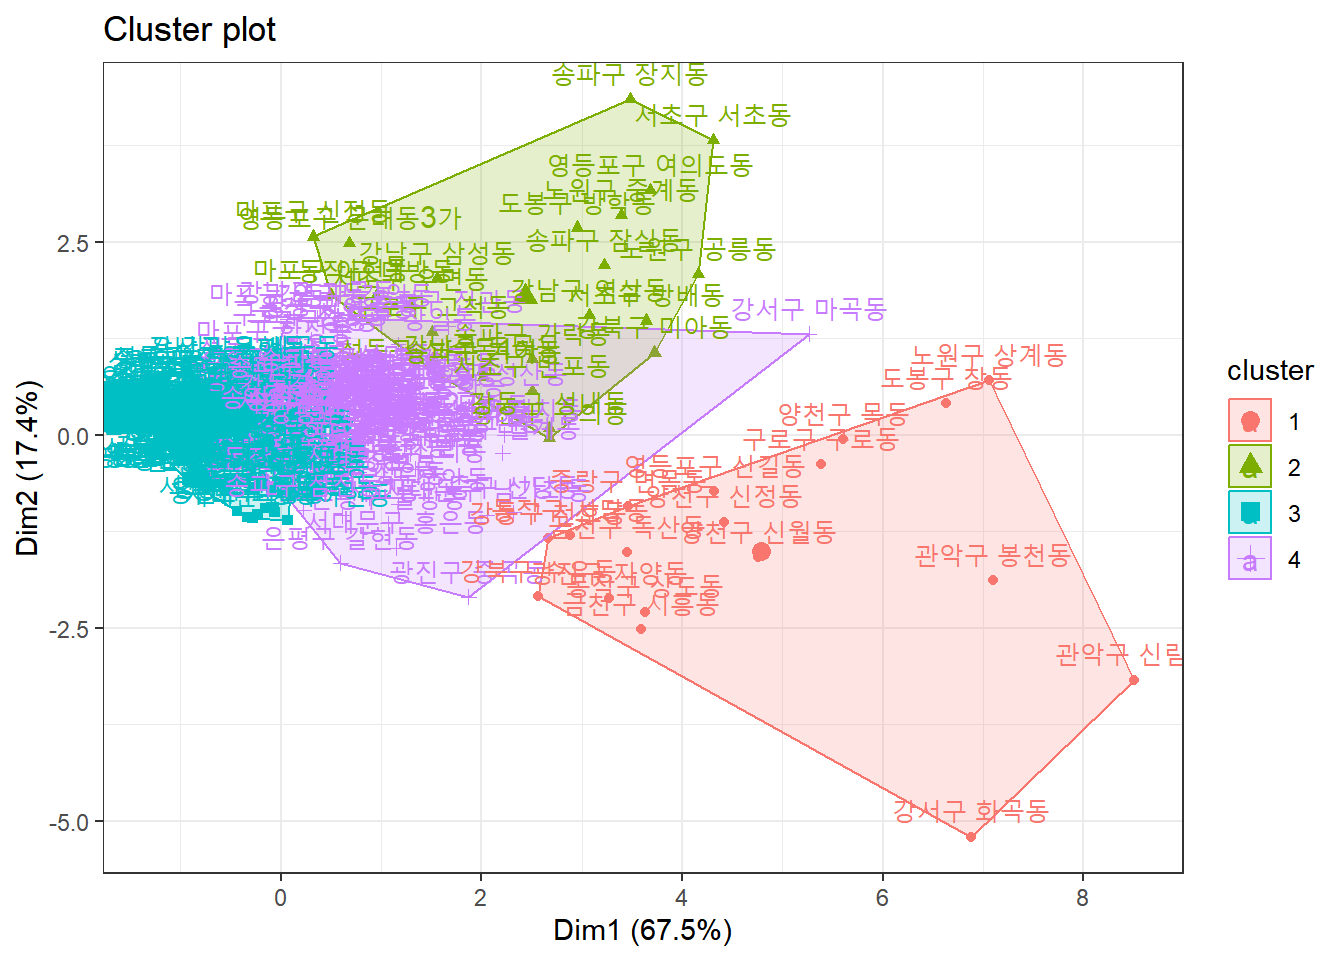

``` r
#km$totss

#km$centers
#km$cluster
k_means <- cbind(df_name6, df6, km$cluster)
#str(k_means)
#str(df6)
# 프로파일링
# 인구수당 택배함 개수, 인구수당 물류창고 개수, 인구수당 공공자전거 거치대수, 인구수당 충전소 개수 
df6$한명당.택배함 <- df6$택배함.개수/df6$인구수
df6$한명당.물류창고 <- df6$물류창고.개수/df6$인구수
df6$한명당.친환경충전소 <- df6$충전소.개수.전기.수소./df6$인구수
df6$한명당.자전거거치대 <- df6$공공자전거.거치대수.LCD...QR./df6$인구수

df_profile <- df6%>%
  select(인구수,
         한명당.택배함,한명당.물류창고,한명당.친환경충전소,한명당.자전거거치대,친환경차.한대당.충전소.개수)

#str(df_profile)
#df6$친환경차.한대당.충전소.개수
```

``` r
# 프로파일링 결과 인구수 가장 많지만 그에 비해 인구수당 시설 적은 군집 1이 target cluster
df_profile %>%
  mutate(clst_k4 = km$cluster)%>%
  group_by(clst_k4)%>%
  summarise_all(mean)
```

``` hljs
## # A tibble: 4 × 7
##   clst_k4  인구수 한명당.택배함 한명당.물류창고 한명당.친환경…¹ 한명당…²  친환…³
##     <int>   <dbl>         <dbl>           <dbl>           <dbl>    <dbl>   <dbl>
## 1       1 138542.     0.0000402     0.000000482       0.0000839  0.00246 0.0332 
## 2       2  61316.     0.0000195     0.00000574        0.00108    0.00418 0.0823 
## 3       3   6716.     0.000399      0.0000252         0.00460    0.0751  0.00841
## 4       4  45298.     0.0000239     0.0000121         0.000180   0.00386 0.0568 
## # … with abbreviated variable names ¹​한명당.친환경충전소, ²​한명당.자전거거치대,
## #   ³​친환경차.한대당.충전소.개수
```

``` r
# k means barplot
#install.packages("flexclust")
library(flexclust)
set.seed(123)

kmeans4 <- kcca(scaled_final, k=4, family=kccaFamily("kmeans"))
summary(kmeans4)
```

``` hljs
## kcca object of family 'kmeans' 
## 
## call:
## kcca(x = scaled_final, k = 4, family = kccaFamily("kmeans"))
## 
## cluster info:
##   size    av_dist  max_dist separation
## 1   27 0.24525321 0.5181974  0.2220825
## 2  236 0.06728184 0.1980636  0.1473380
## 3   82 0.15713865 0.8731101  0.1492372
## 4   18 0.32981481 0.6183117  0.3389352
## 
## convergence after 9 iterations
## sum of within cluster distances: 41.32239
```

``` r
#image(kmeans8)
#points(scaled_final)
# 현재 열려있는 그래픽 장치를 닫고 초기화
#dev.off()
# 모든 그래픽 장치를 닫고 초기화
#graphics.off()
# 군집 특성 확인
barplot(kmeans4)
```

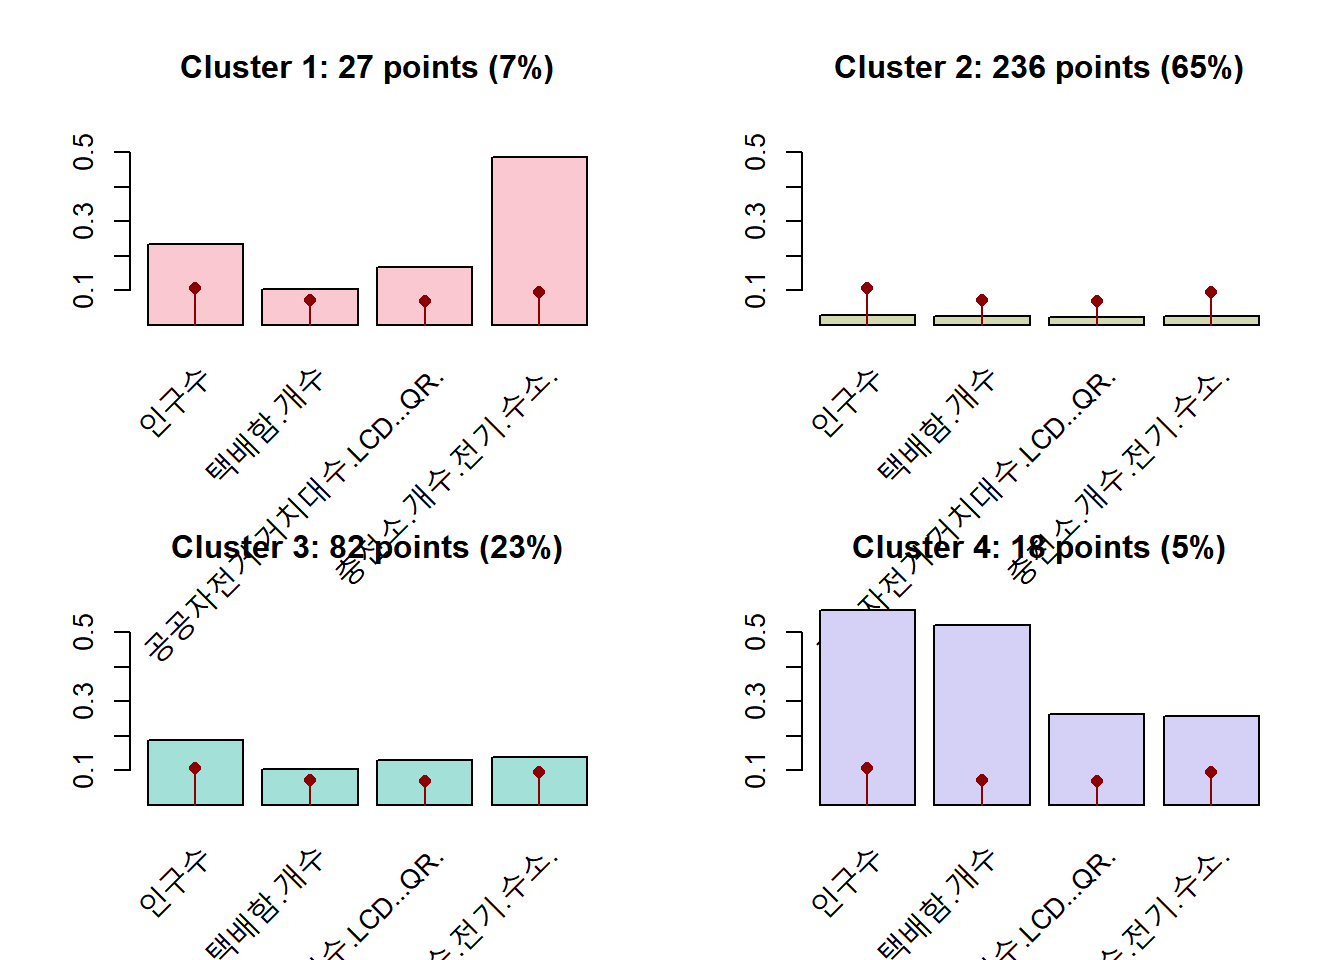

``` r
# target 추출
k_means_result <- k_means[km$cluster == 1, "법정동"]
k_means_result
```

``` hljs
##  [1] "광진구 자양동"   "중랑구 면목동"   "강북구 수유동"   "도봉구 창동"    
##  [5] "노원구 상계동"   "양천구 신정동"   "양천구 목동"     "양천구 신월동"  
##  [9] "강서구 화곡동"   "구로구 구로동"   "금천구 독산동"   "금천구 시흥동"  
## [13] "영등포구 신길동" "동작구 상도동"   "동작구 사당동"   "관악구 봉천동"  
## [17] "관악구 신림동"   "강동구 천호동"
```